In [ ]:
# This script plots se distribution for disease and health group.
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.rcParams['font.family'] = 'Arial'
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# plot three figures for a dataset
def draw_all(cohort_dict, cluster, title, p_value, outpath):
    # process the data
    df = pd.DataFrame(columns=['SE', 'Phenotype'])
    phenos = list(cohort_dict.keys())
    color_dict = {'Health':'#3784BB'}
    p = ''
    for pheno in phenos:
        if pheno not in color_dict.keys():
            p = pheno
            color_dict[pheno] = '#C84940'
    for pheno in phenos:
        df_tmp = pd.DataFrame(columns=['SE', 'Phenotype'])
        df_tmp['SE'] = cohort_dict[pheno][cluster]
        df_tmp['Phenotype'] = pheno
        df = pd.concat([df, df_tmp])
    df.sort_values(by='SE', inplace=True)

    #fig, axes = plt.subplots(1, 5, figsize=(15, 4))
    fig = plt.figure(figsize=(15, 4))
    gs = GridSpec(1, 3, width_ratios=[1, 0.8, 2])
    
    # first plot: percentage of 0 in each phenotype
    ax = fig.add_subplot(gs[1])
    health_total = len(cohort_dict['Health'][cluster])
    health_zero = sum(cohort_dict['Health'][cluster] == 0)
    health_zero_ratio = health_zero / health_total
    case_total = len(cohort_dict[p][cluster])
    case_zero = sum(cohort_dict[p][cluster] == 0)
    case_zero_ratio = case_zero / case_total
    x = [0.7, 1.3]
    ax.bar(x, [case_zero_ratio, health_zero_ratio], color=['#CCCCCC', '#CCCCCC'], label='zero', width=0.4, edgecolor='black')
    ax.bar(x[0], bottom=[case_zero_ratio], height=[1-case_zero_ratio], color=['#C84940'], label='non-zero', width=0.4, edgecolor='black')
    ax.bar(x[1], bottom=[health_zero_ratio], height=[1-health_zero_ratio], color=[color_dict['Health']], label='non-zero', width=0.4, edgecolor='black')
    
    if case_zero_ratio > 0.9:
        ax.text(x[0], case_zero_ratio-0.05, str(case_zero), ha='center', va='center')
    else:
        ax.text(x[0], case_zero_ratio+0.05, str(case_zero), ha='center', va='center')

    if health_zero_ratio > 0.9:
        ax.text(x[1], health_zero_ratio-0.05, str(health_zero), ha='center', va='center')
    else:
        ax.text(x[1], health_zero_ratio+0.05, str(health_zero), ha='center', va='center')
    
    ax.text(x[0], 1.05, str(case_total), ha='center', va='center')
    ax.text(x[1], 1.05, str(health_total), ha='center', va='center')
    
    #ax.legend()
    plt.xticks(x, [p, 'Health'])
    ax.set_xlabel('Phenotype')
    ax.set_ylabel('Propotion')
    ax.set_title('Samples with SE=0')
    ax.set_ylim(0, 1.2)
    ax.set_xlim(0.3, 1.7)

    # second plot: boxplot of SE
    category_order = [p, 'Health']
    ax = fig.add_subplot(gs[0])
    sns.violinplot(x='Phenotype', y='SE', data=df, ax=ax, dodge=False,
                    palette=color_dict,
                    scale="width", inner=None,order=category_order)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    for violin in ax.collections:
        bbox = violin.get_paths()[0].get_extents()
        x0, y0, width, height = bbox.bounds
        violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))
    sns.boxplot(x='Phenotype', y='SE', data=df, ax=ax, saturation=1, showfliers=False,
            width=0.3, boxprops={'zorder': 3, 'facecolor': 'none'},order=category_order)
    old_len_collections = len(ax.collections)
    sns.stripplot(x='Phenotype', y='SE', data=df, ax=ax, palette=color_dict, dodge=False,order=category_order)
    for dots in ax.collections[old_len_collections:]:
        dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))    
        ax.set_ylim(ylim)
    #sns.boxplot(x='Phenotype', y='SE', data=df, ax=ax, palette=color_dict, width=0.5, order=category_order)
    ax.set_xlabel('Phenotype')
    ax.set_ylabel('SE')
    ax.set_title('SE distribution\n(p = {:.4f})'.format(p_value))
    

    # third plot: scatter plot of SE without 0
    df_nonzero = df[df['SE'] != 0]
    df_nonzero.reset_index(inplace=True)
    ax = fig.add_subplot(gs[2])
    ax.scatter(np.arange(len(df_nonzero))+1, df_nonzero['SE'], c=[color_dict[i] for i in df_nonzero['Phenotype']], s=10)
    case_legend = plt.Line2D([], [], marker='o', color='#C84940', label=p)
    control_legend = plt.Line2D([], [], marker='o', color=color_dict['Health'], label='Health')
    #ax.legend(handles=[case_legend, control_legend])
    ax.set_ylabel('SE')
    ax.set_ylim(ylim)
    ax.set_xlabel('Samples')
    ax.set_title('Excluding SE = 0')
    ax.yaxis.set_ticklabels([]) 

    plt.suptitle(title)
    plt.tight_layout()
    plt.savefig(outpath, dpi=300, format='svg')


<ipython-input-2-d66a30dc22b4>:71: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Phenotype', y='SE', data=df, ax=ax, palette=color_dict, dodge=False,order=category_order)
<ipython-input-2-d66a30dc22b4>:71: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Phenotype', y='SE', data=df, ax=ax, palette=color_dict, dodge=False,order=category_order)
<ipython-input-2-d66a30dc22b4>:71: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Phenotype', y='SE', data=df, ax=ax, palette=color_dict, dodge=False,order=category_order)
<ipython-input-2-d66a30dc22b4>:71: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Phenotype', y='SE', data=df, ax=ax, palette=color_dict, dodge=False,order=category_order)
<ipython-input-2-d66a30dc22b4>:71: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Phenotype'

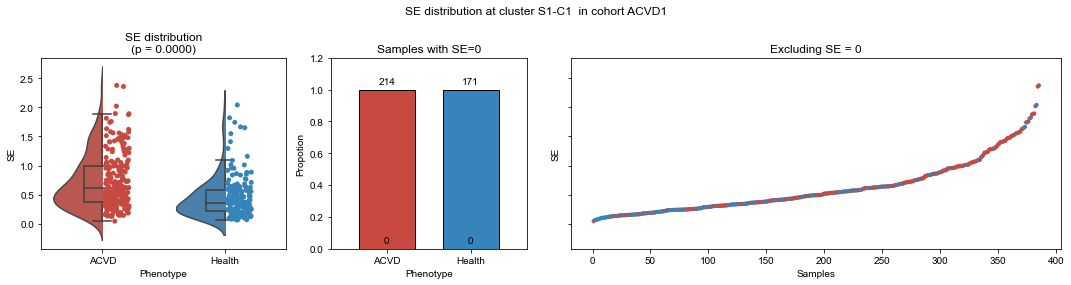

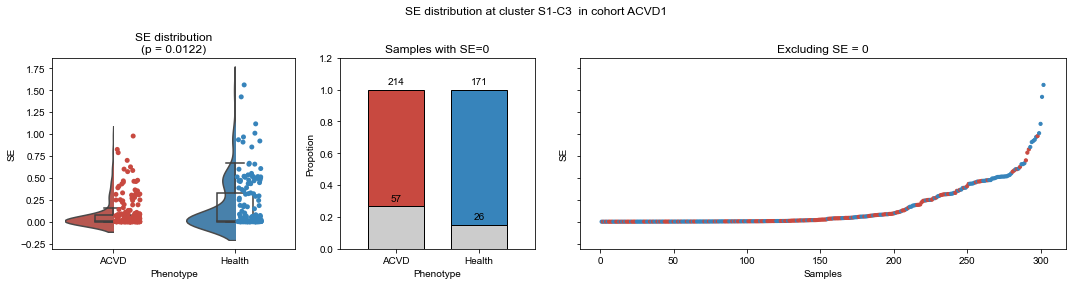

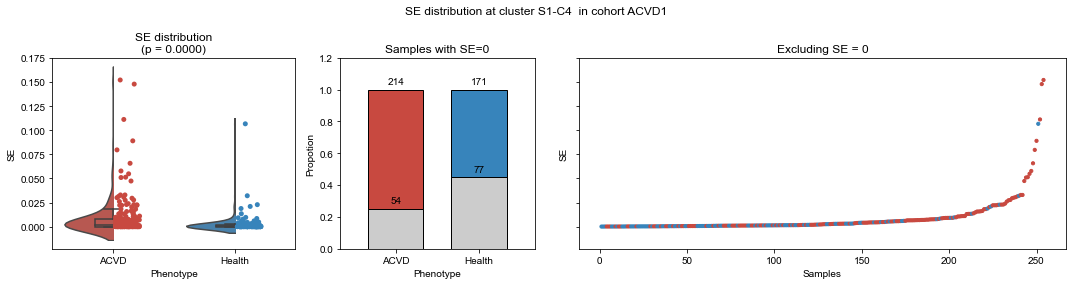

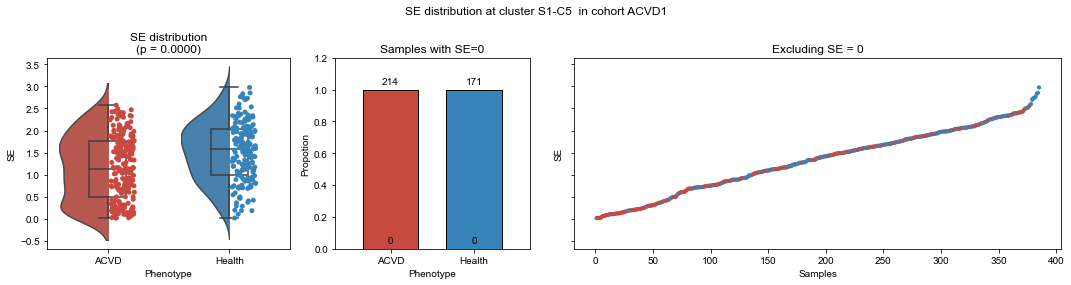

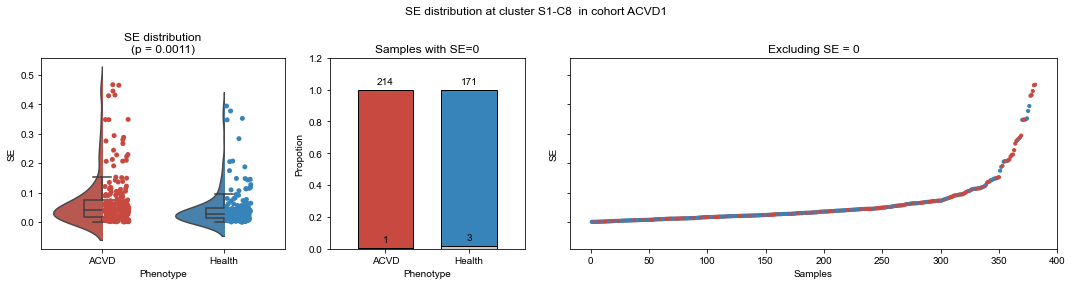

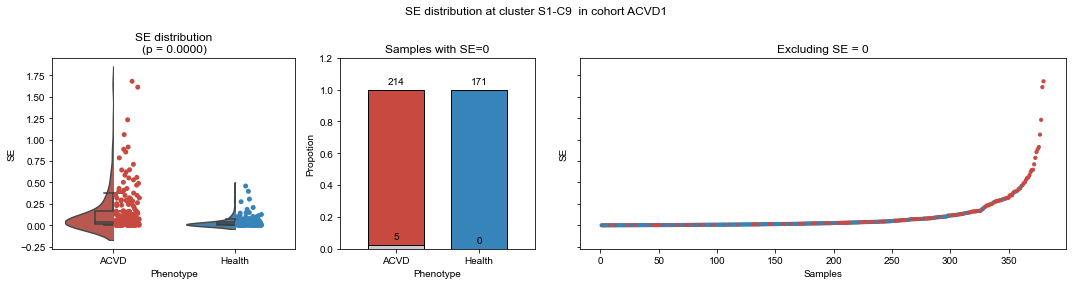

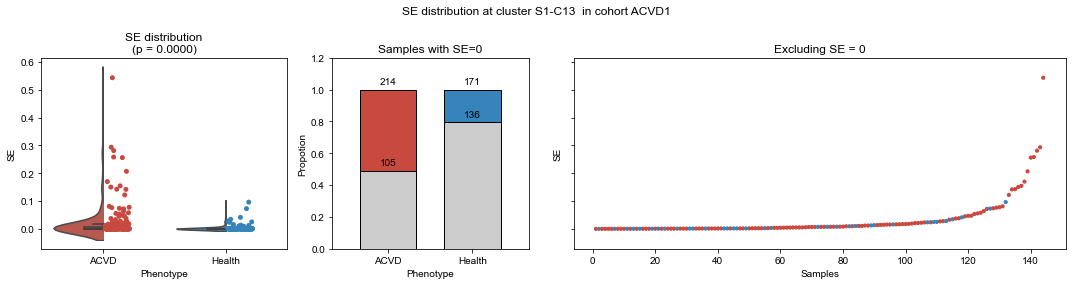

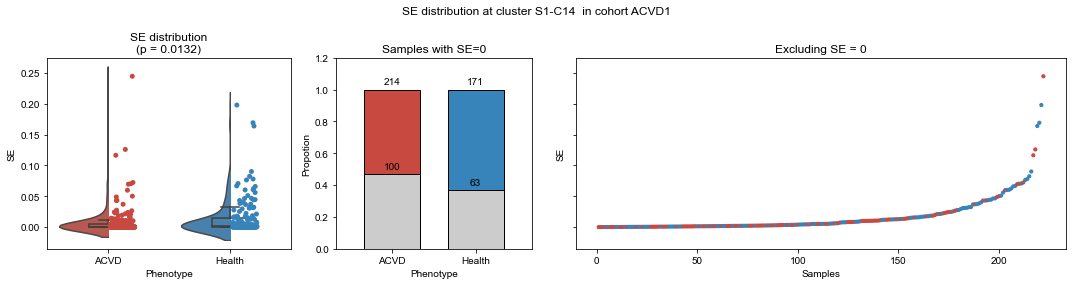

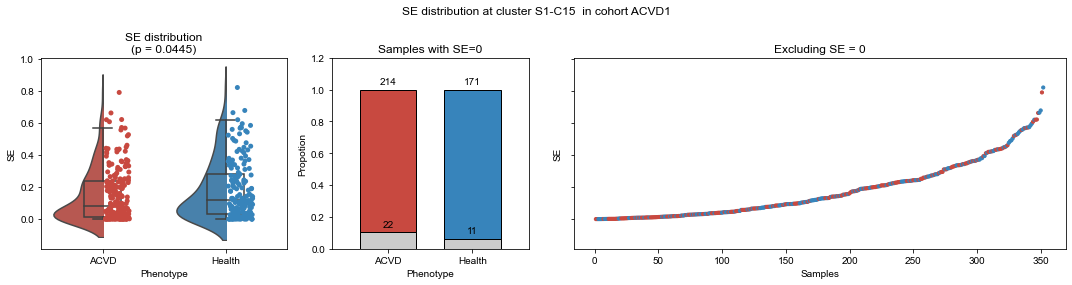

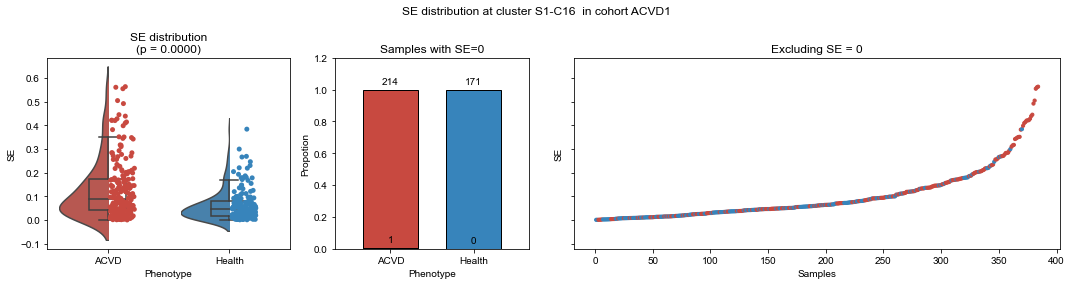

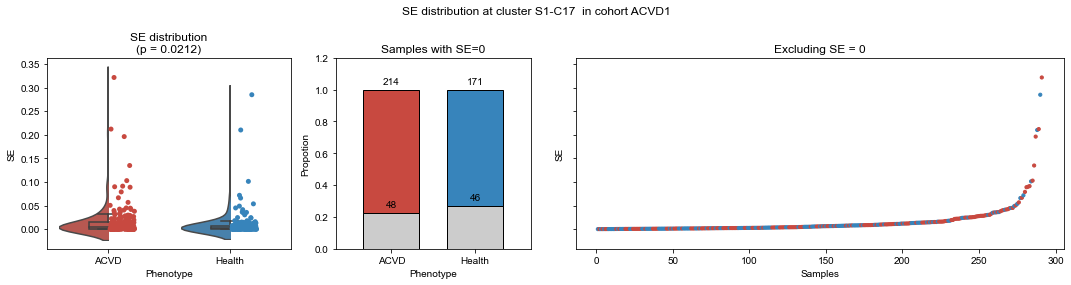

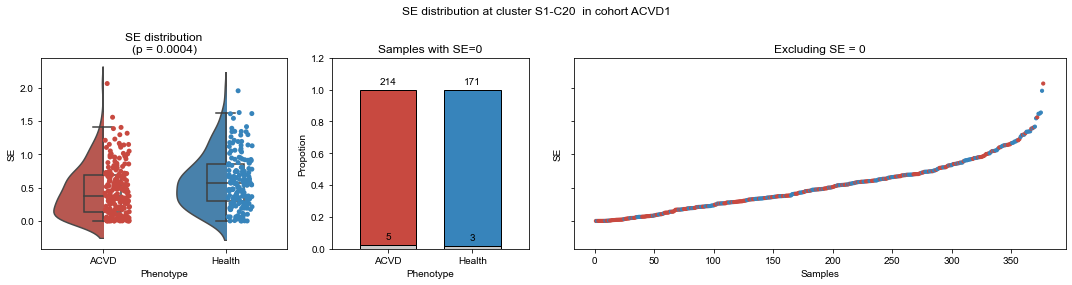

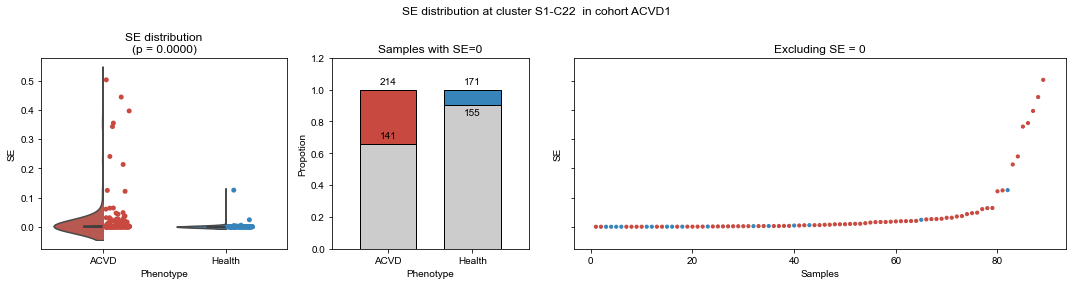

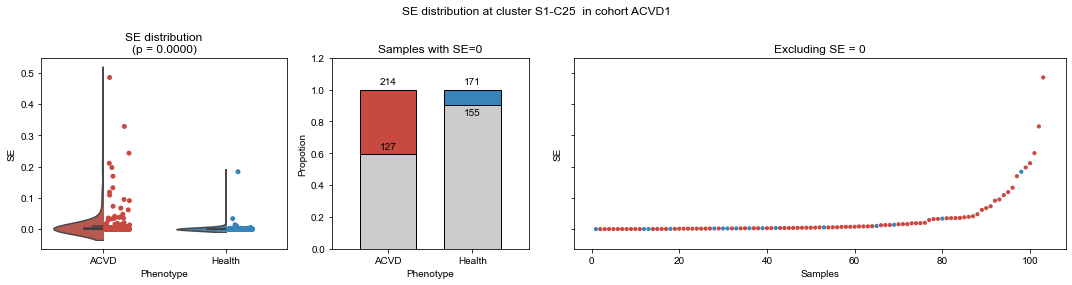

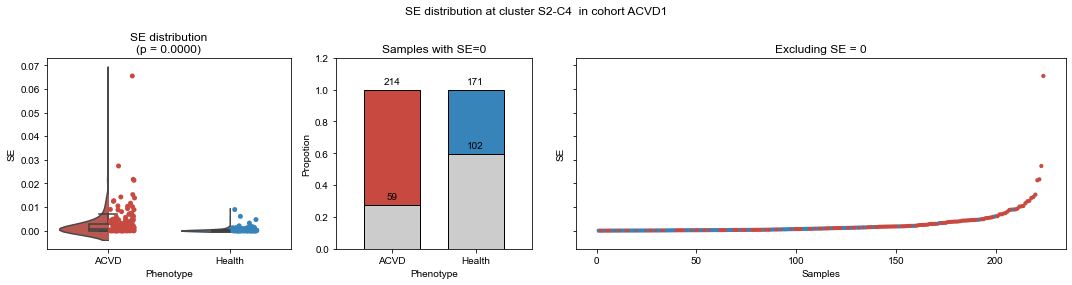

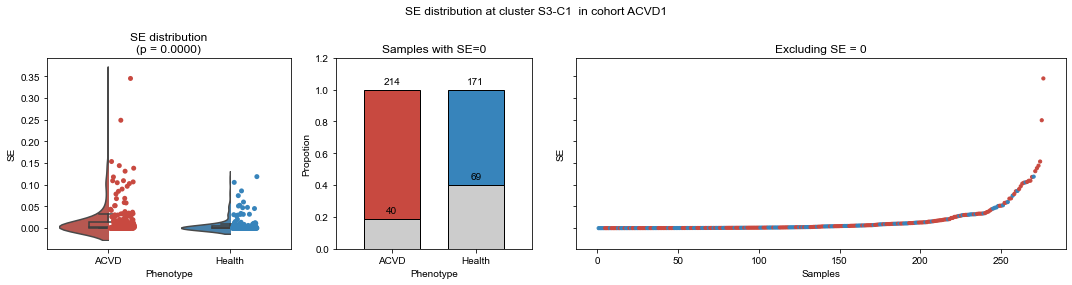

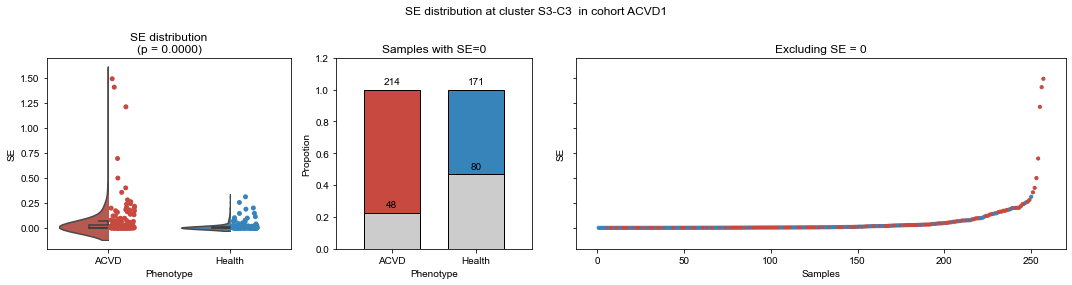

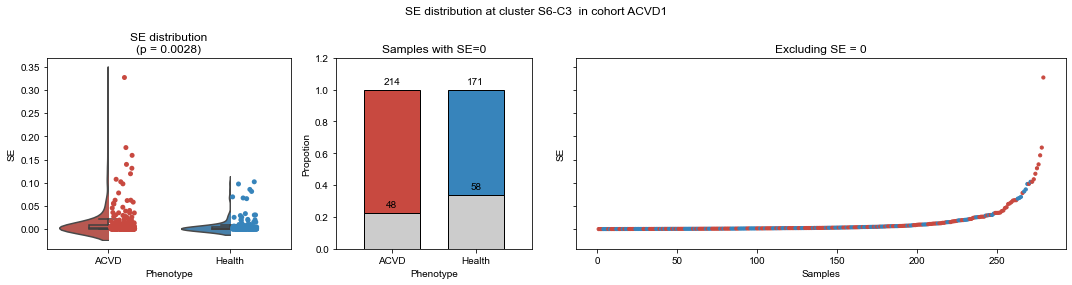

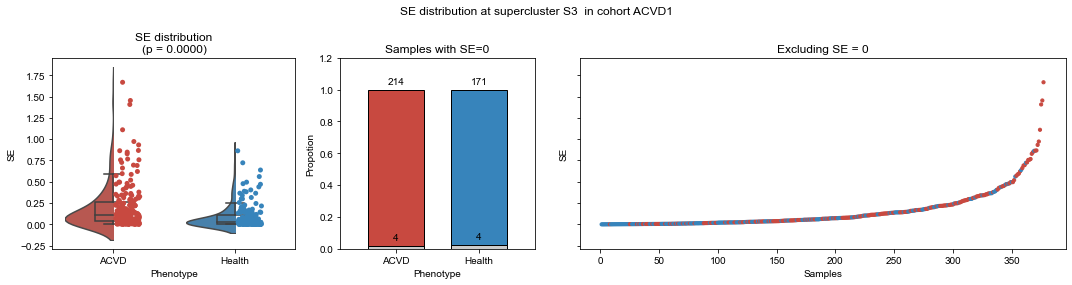

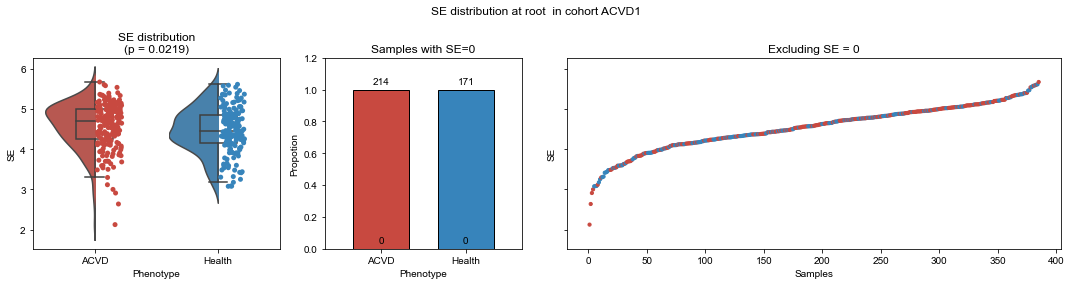

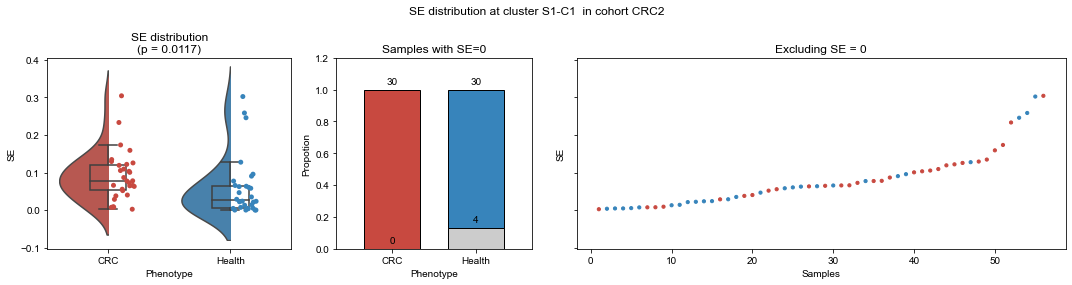

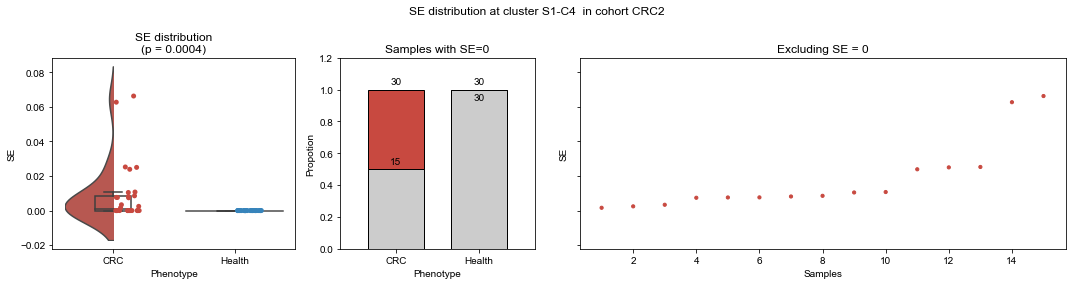

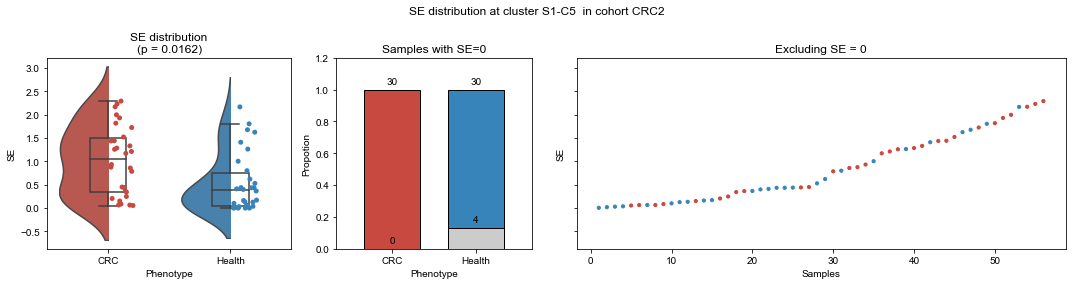

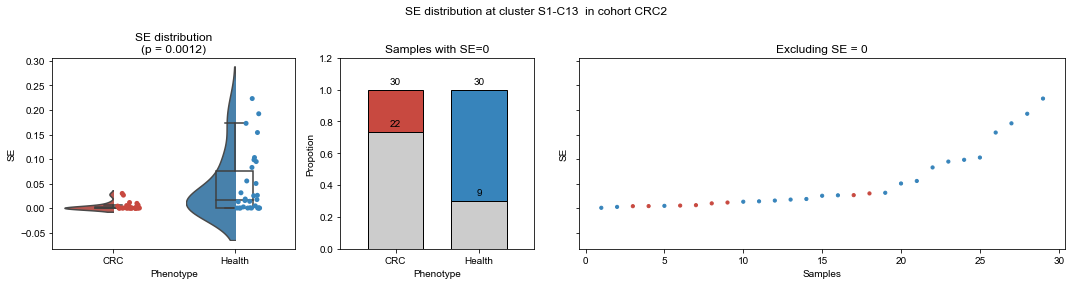

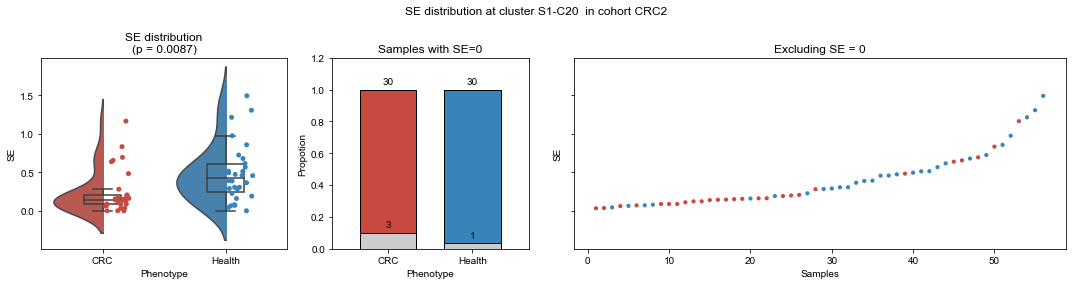

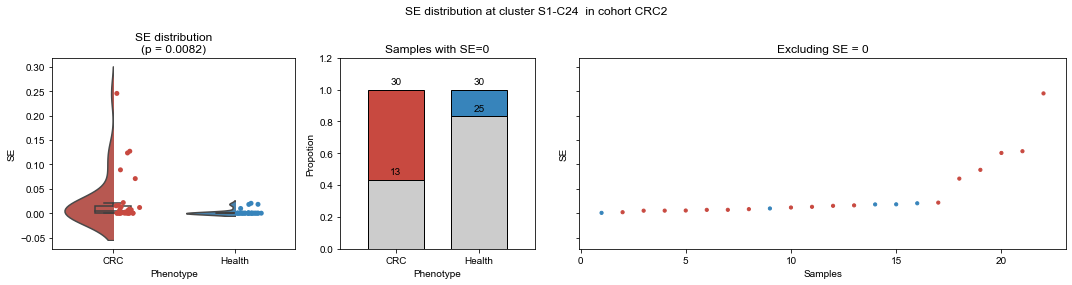

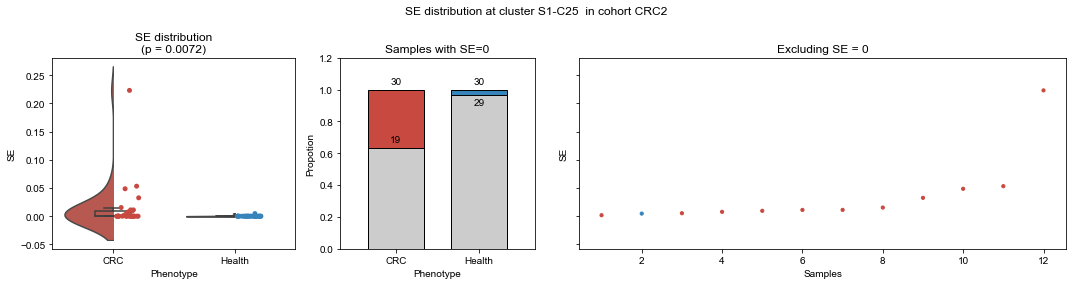

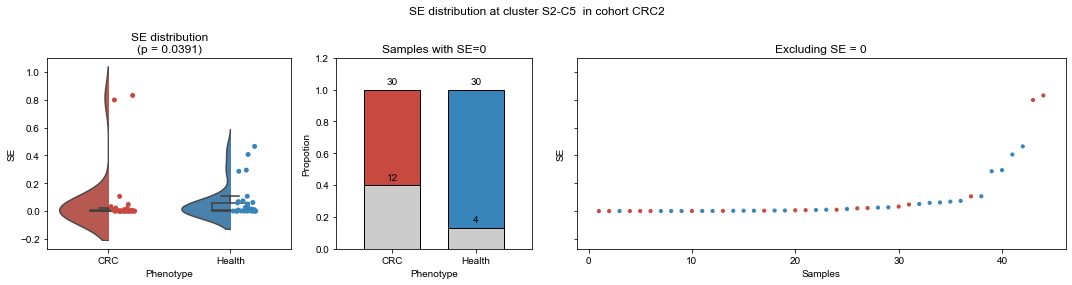

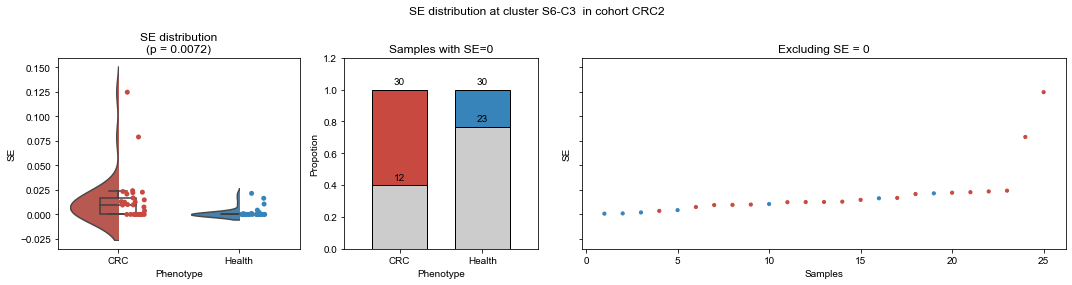

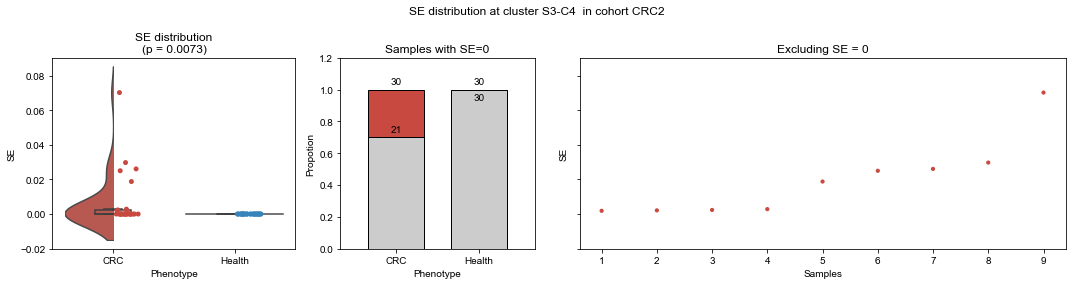

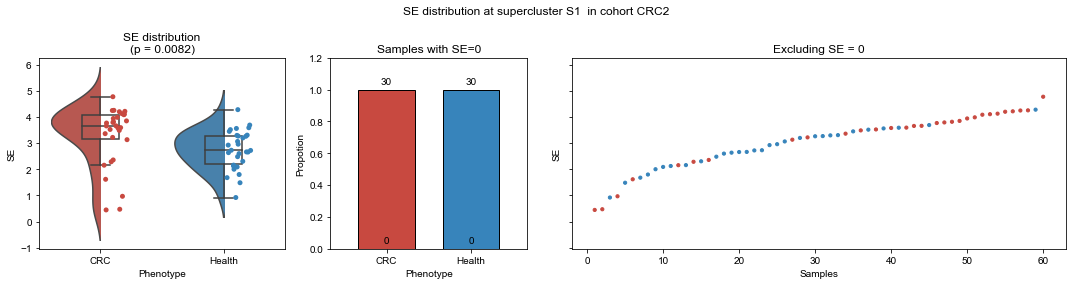

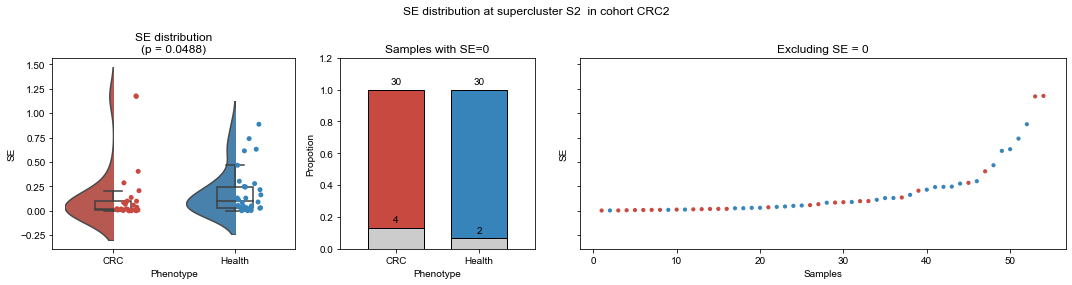

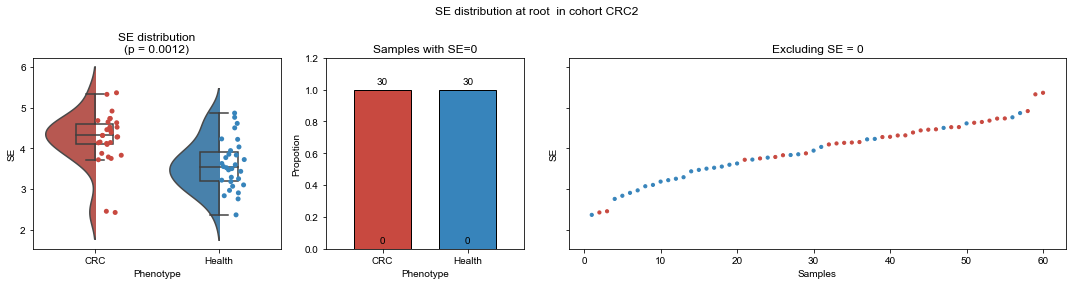

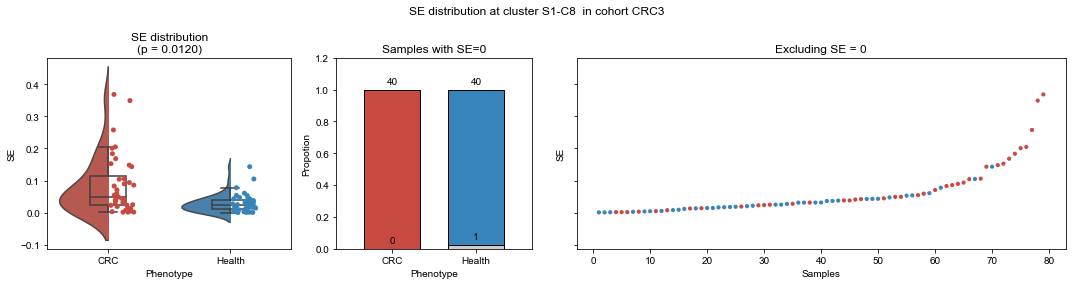

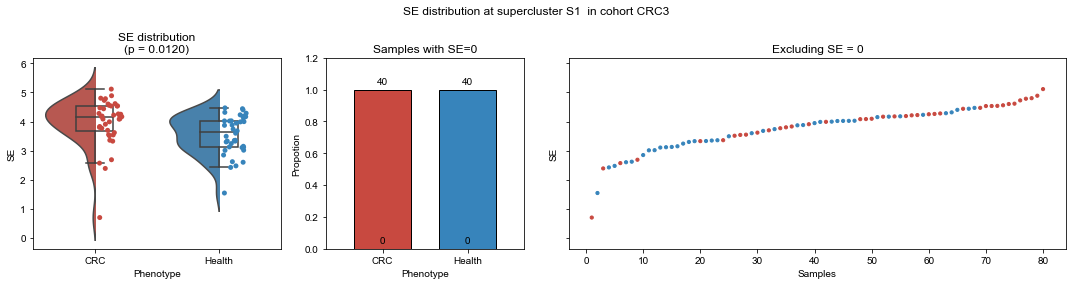

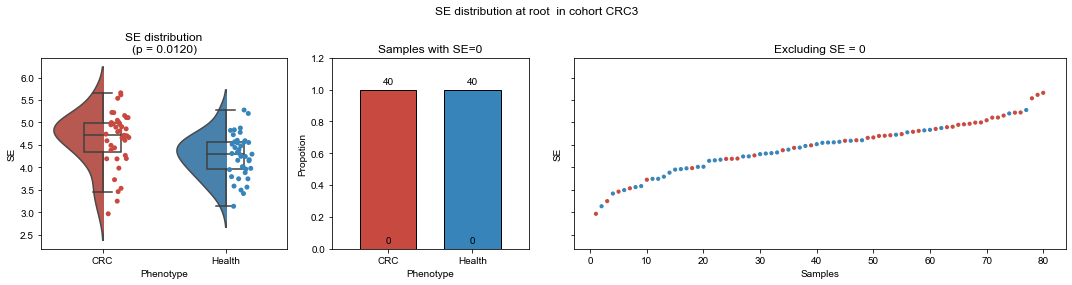

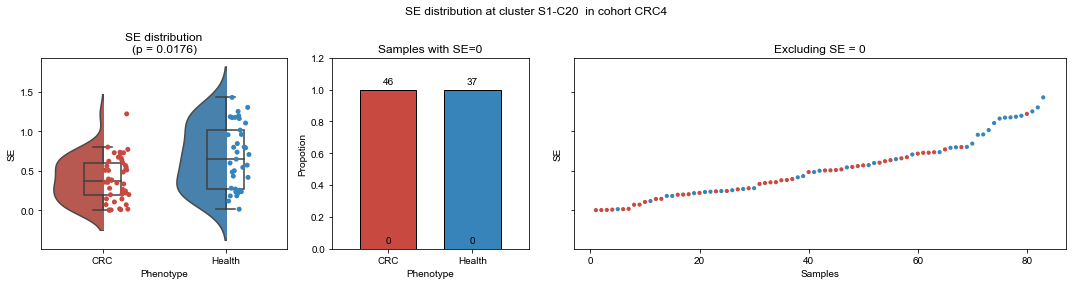

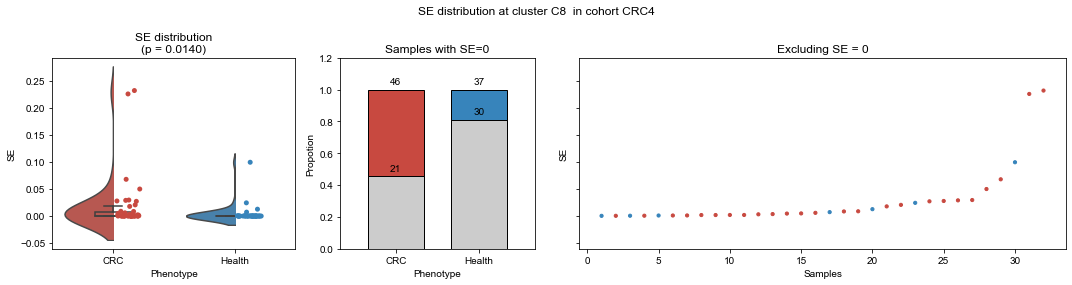

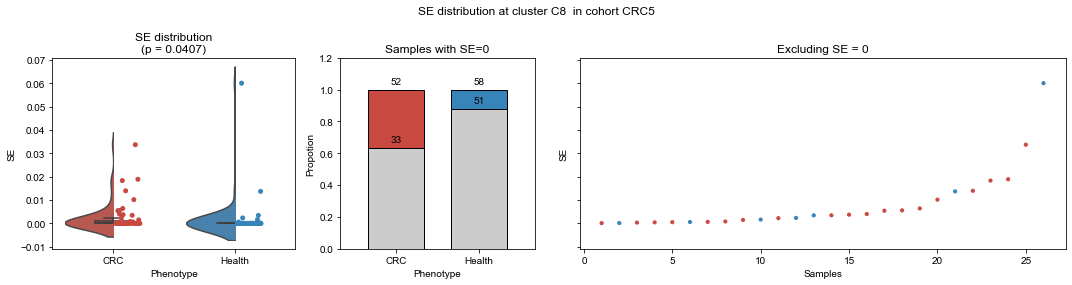

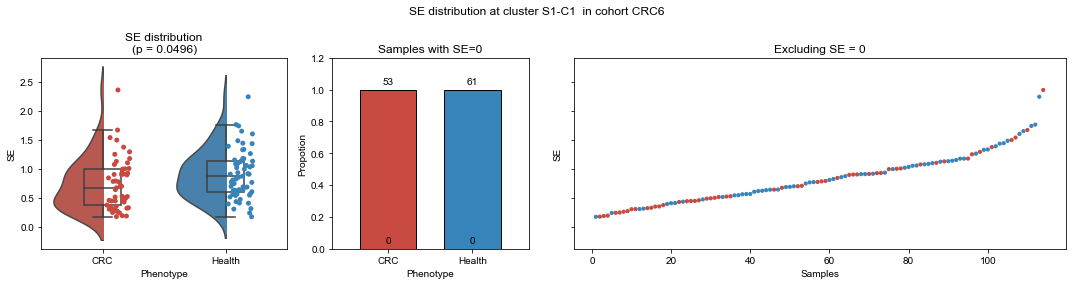

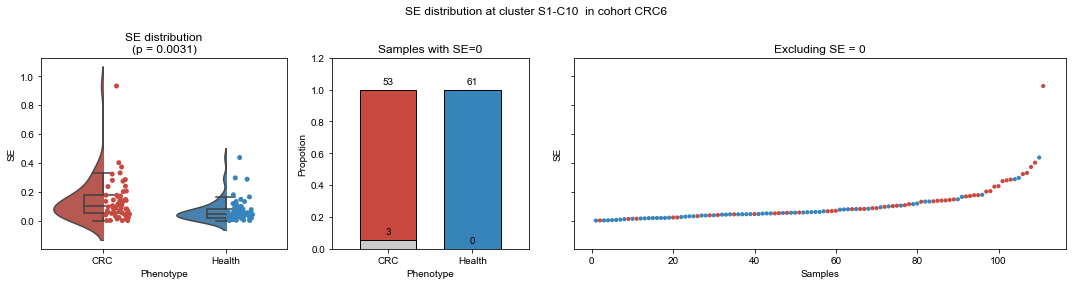

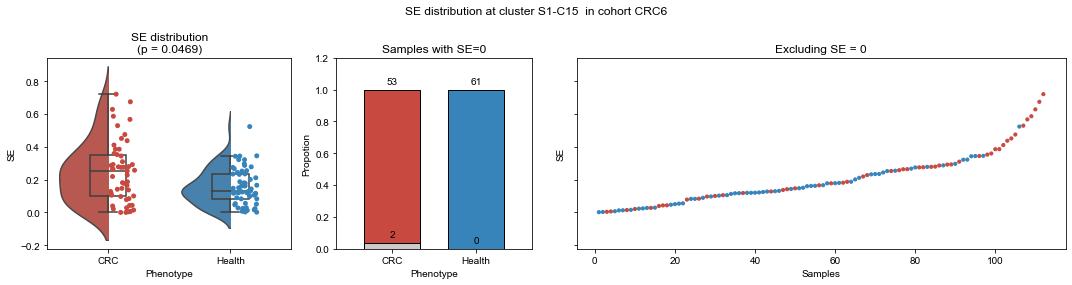

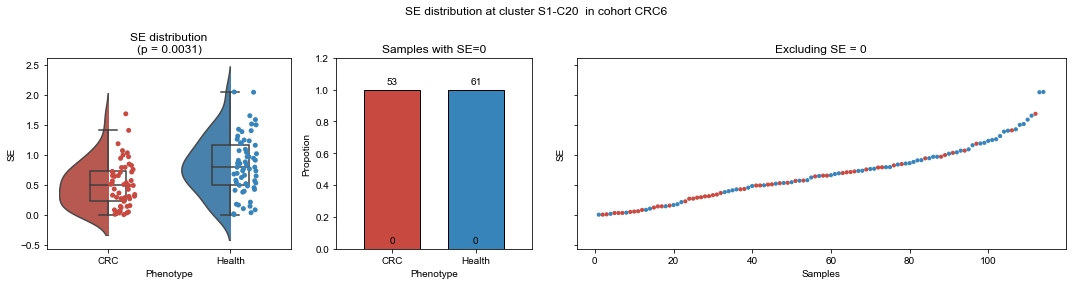

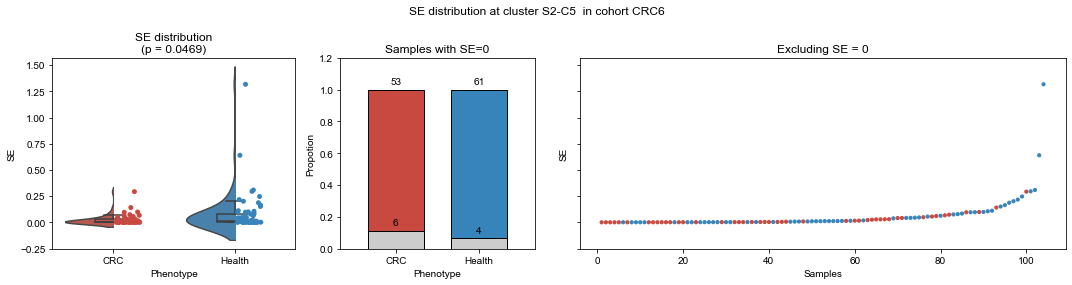

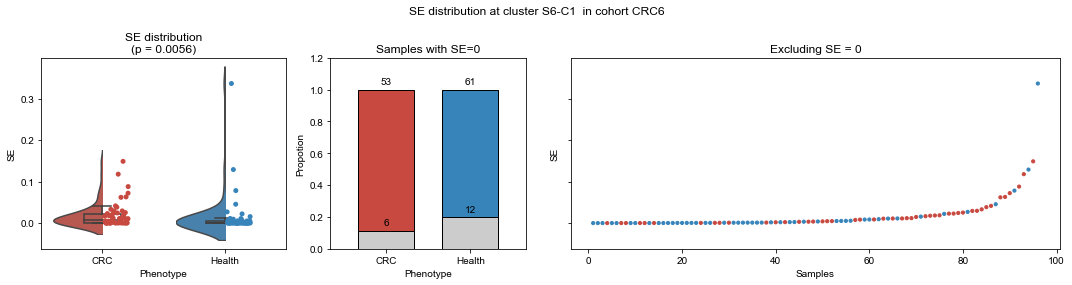

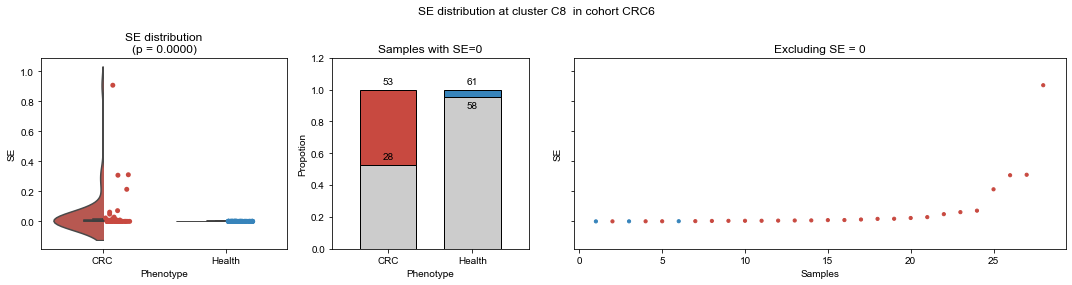

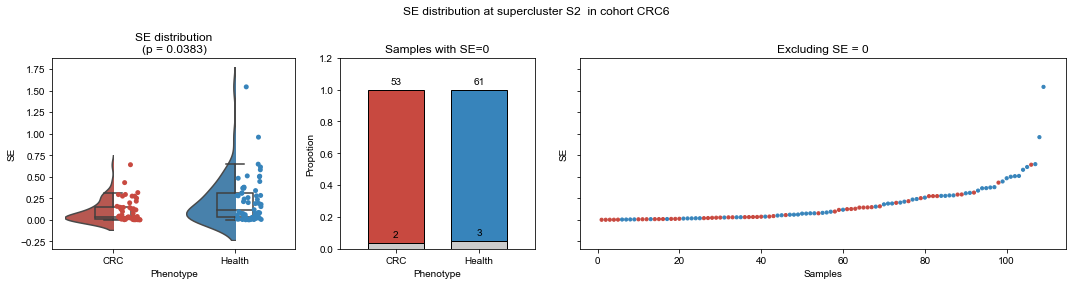

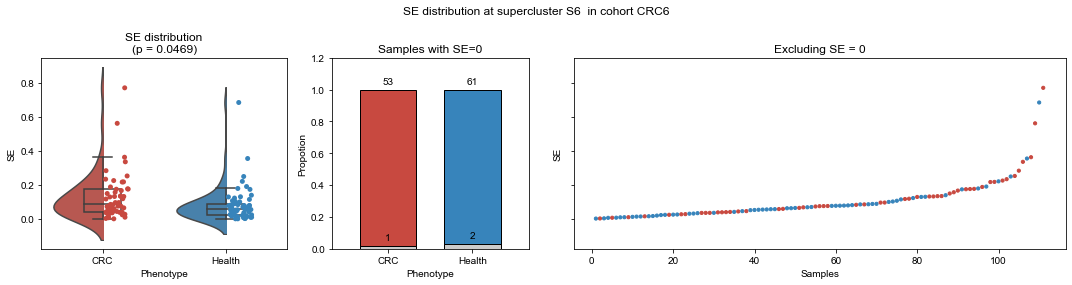

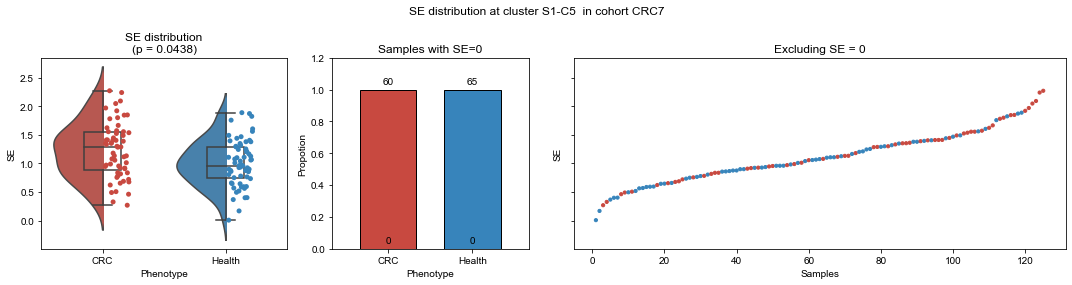

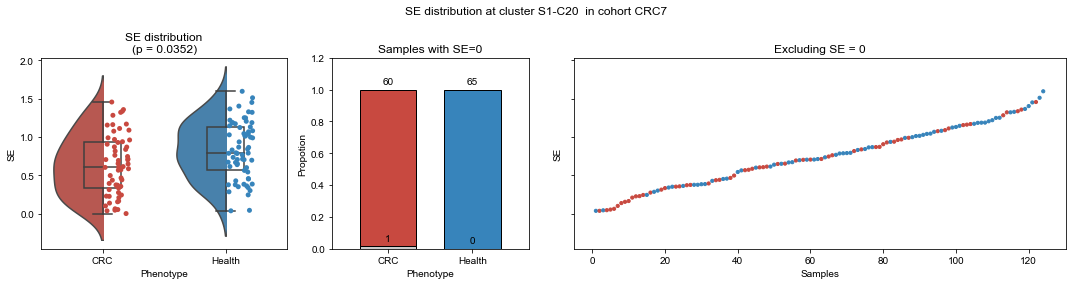

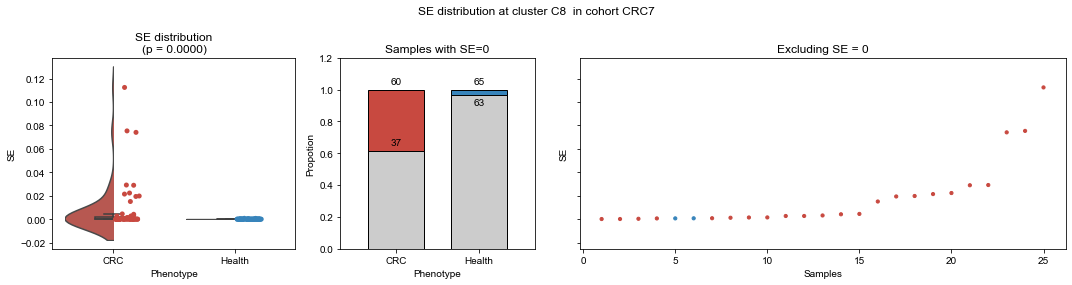

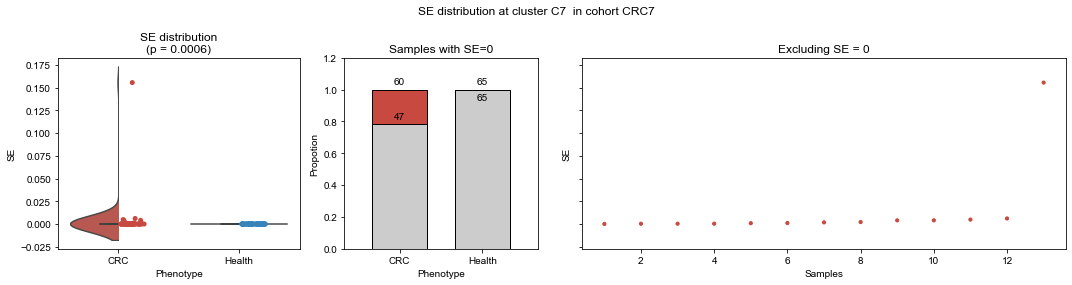

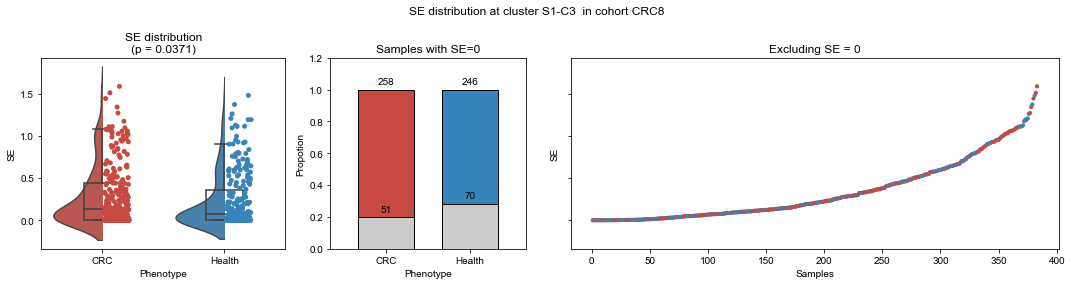

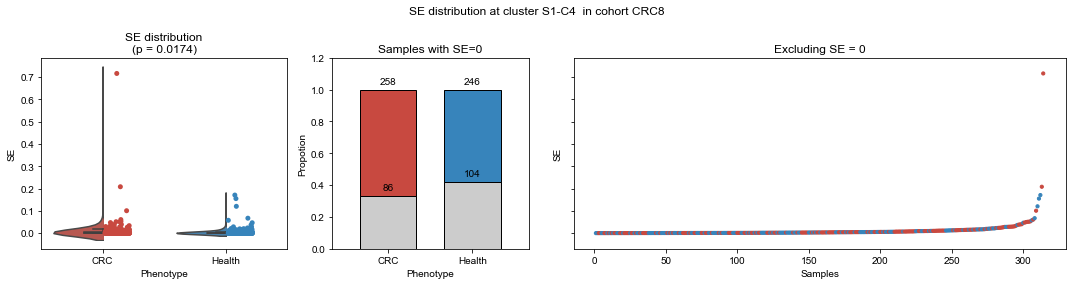

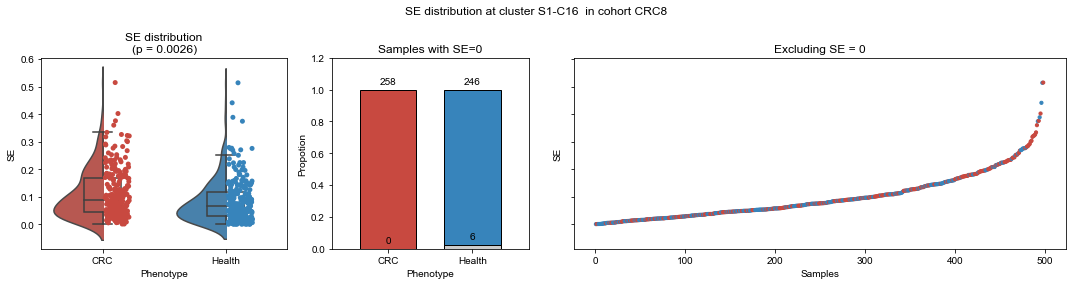

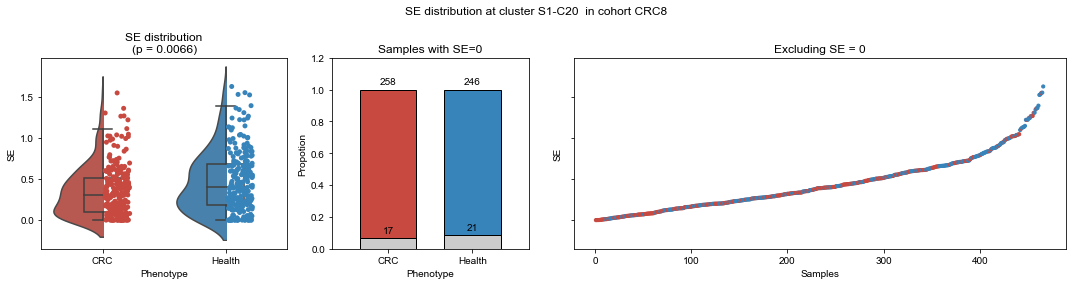

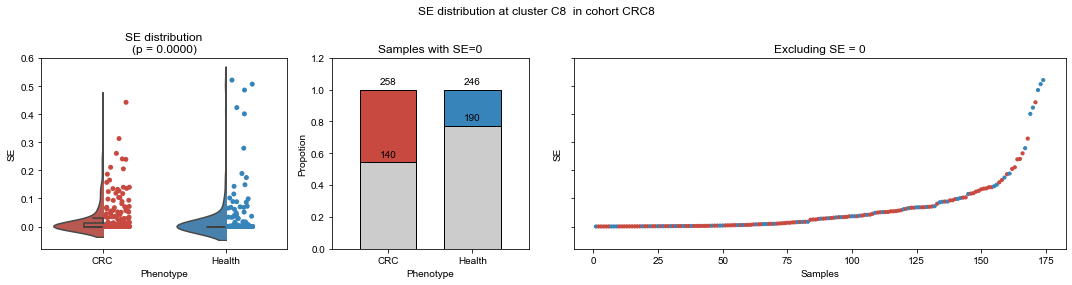

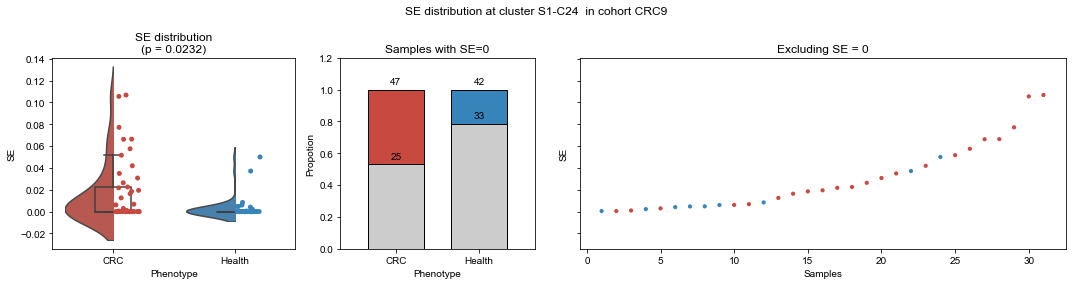

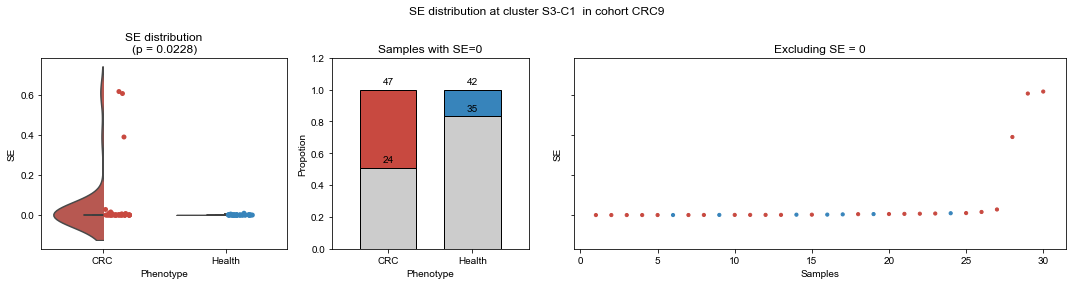

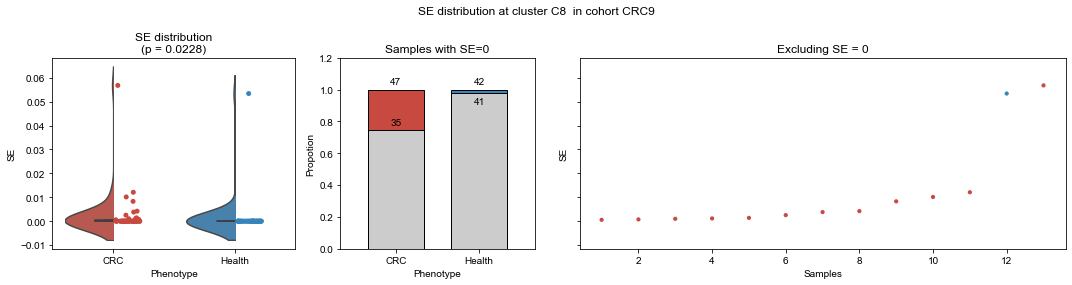

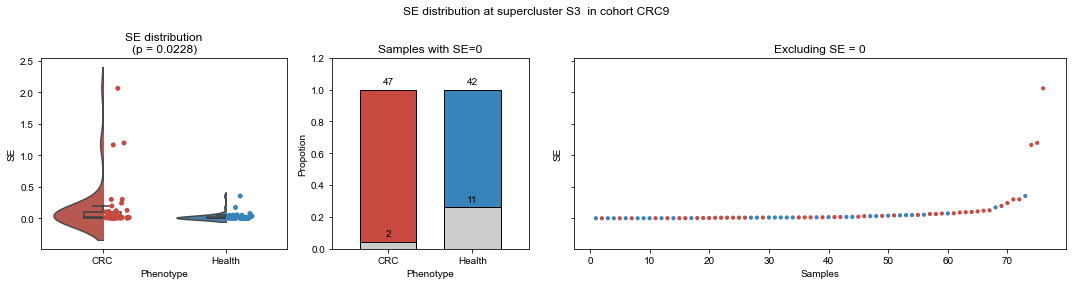

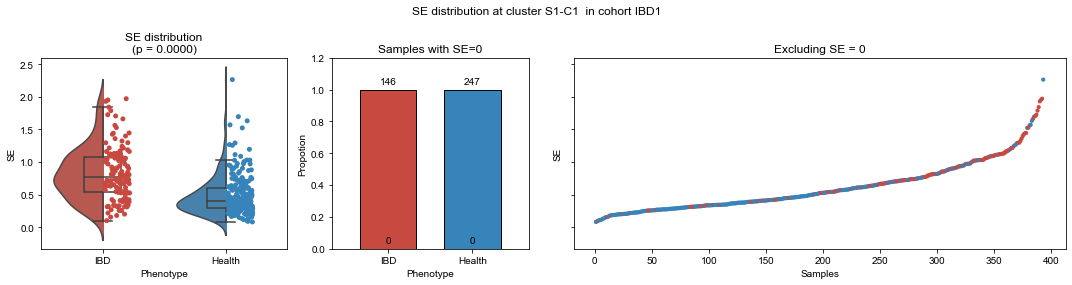

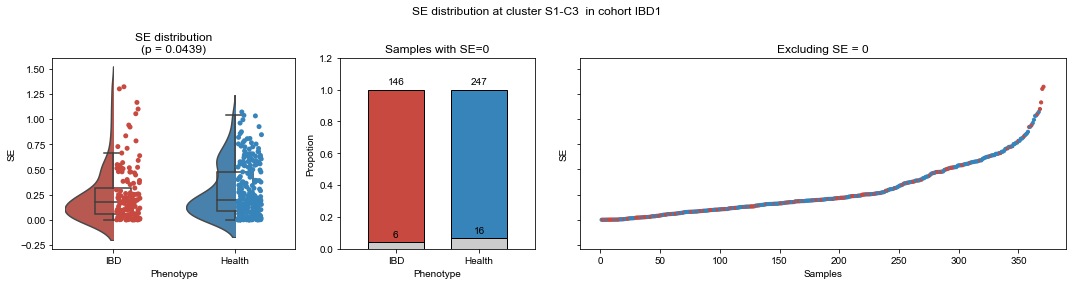

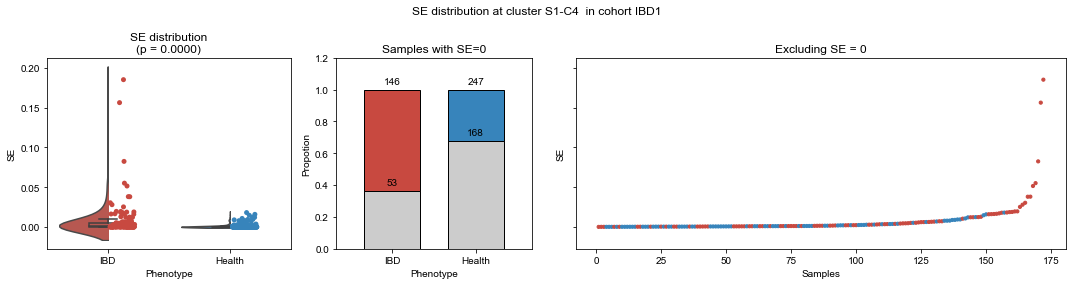

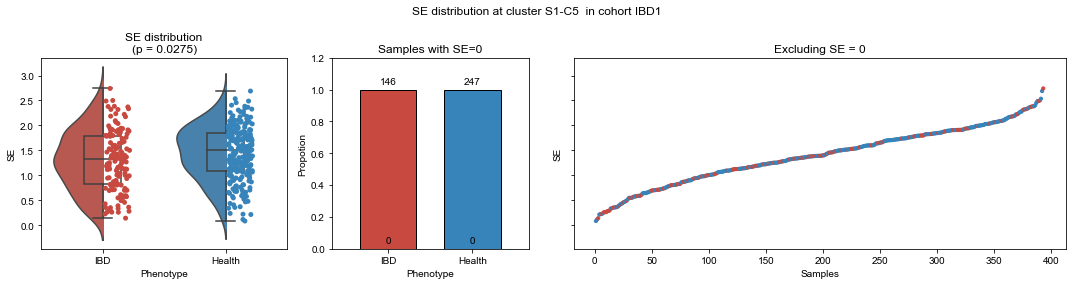

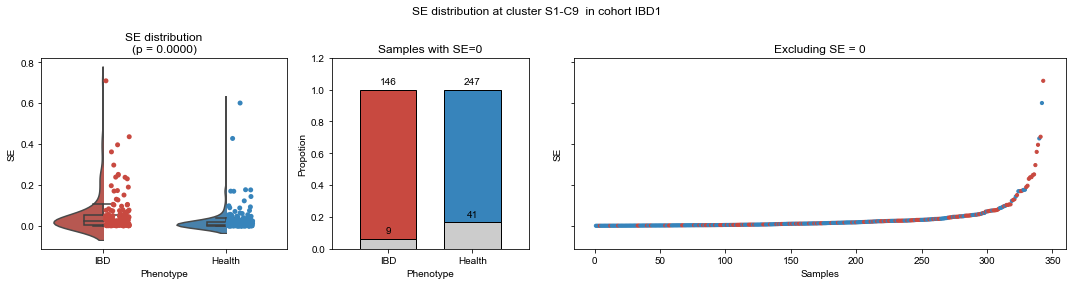

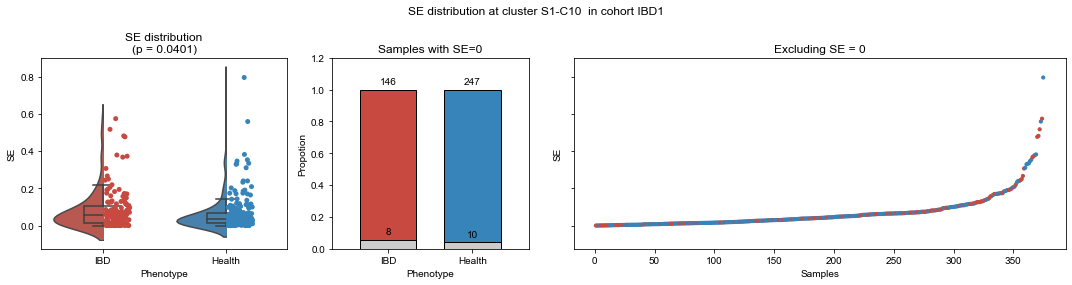

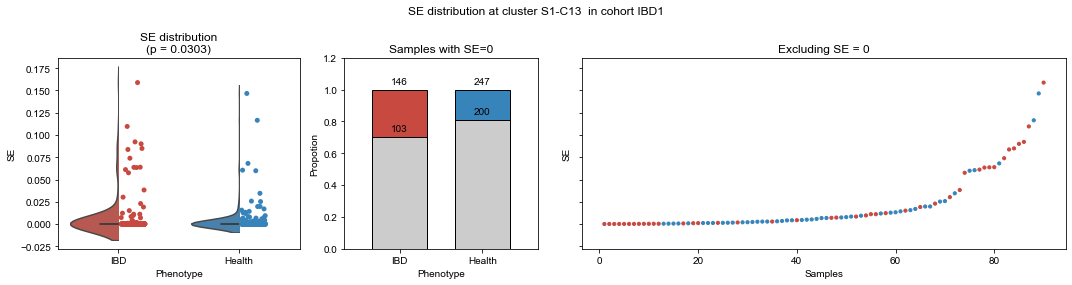

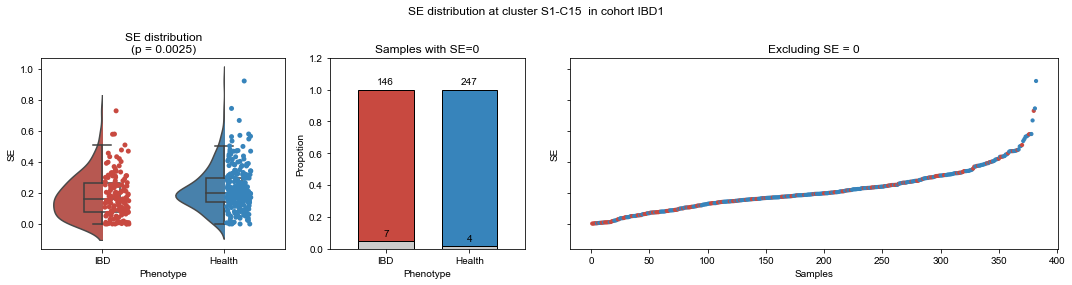

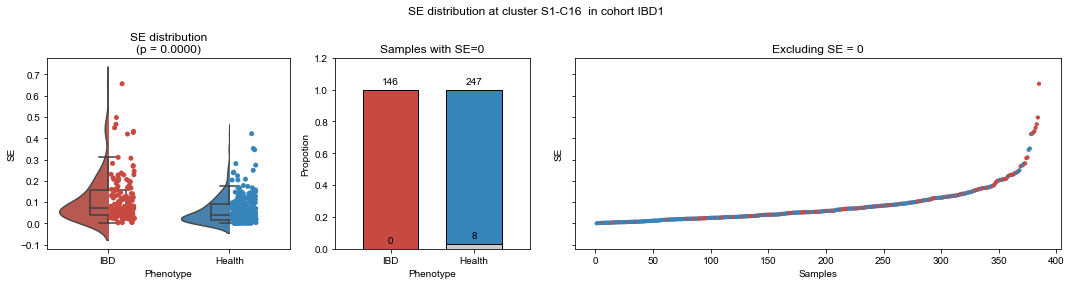

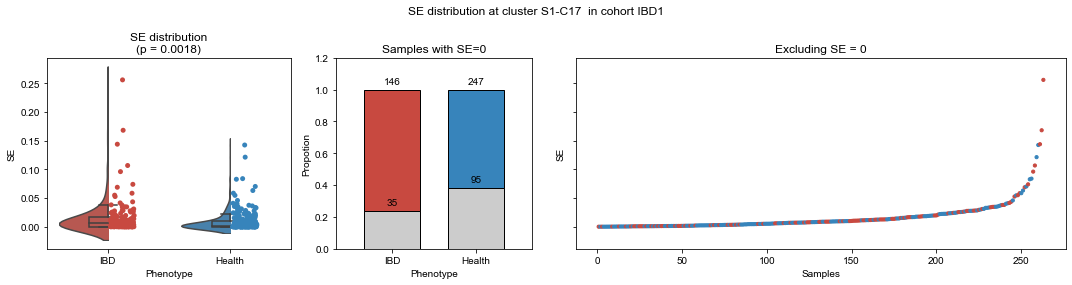

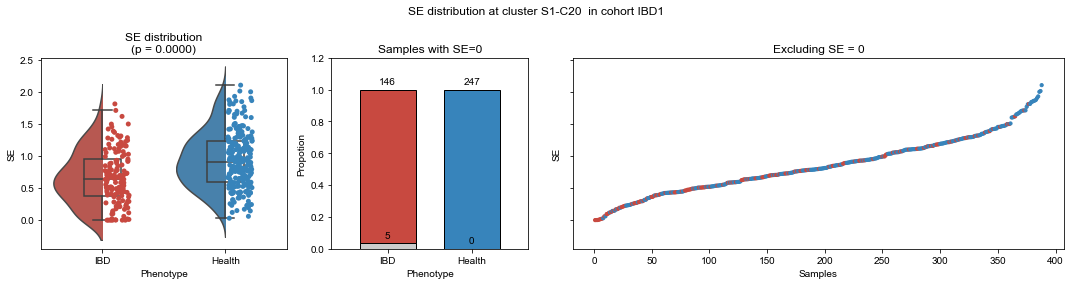

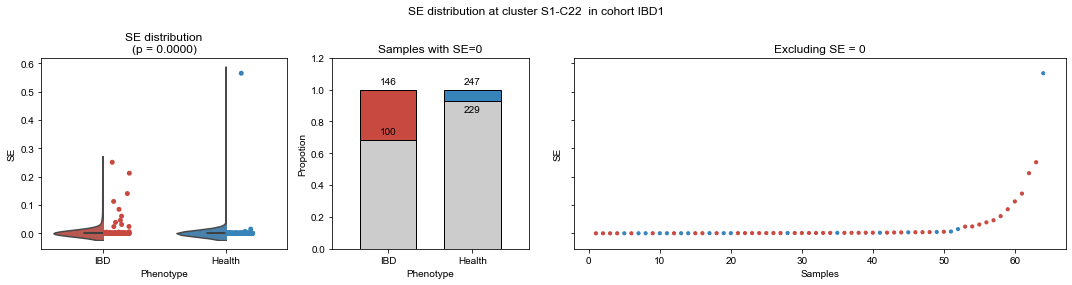

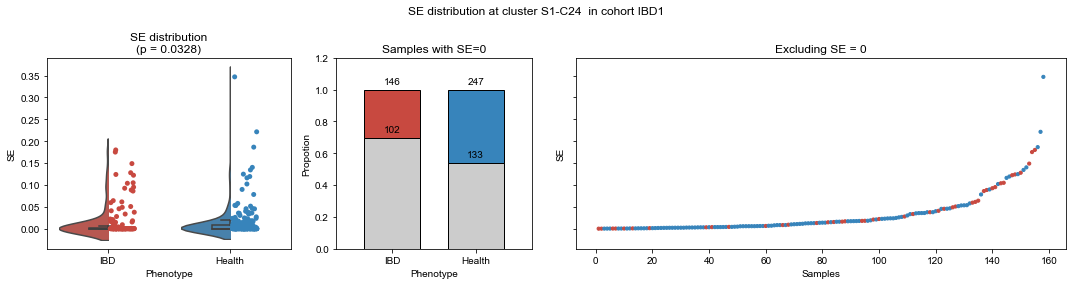

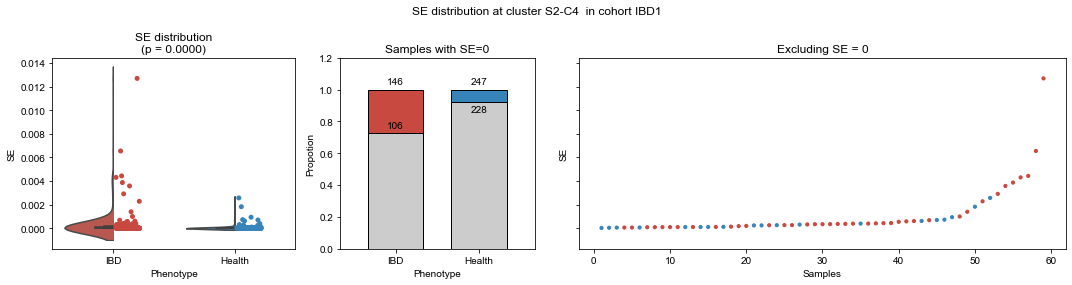

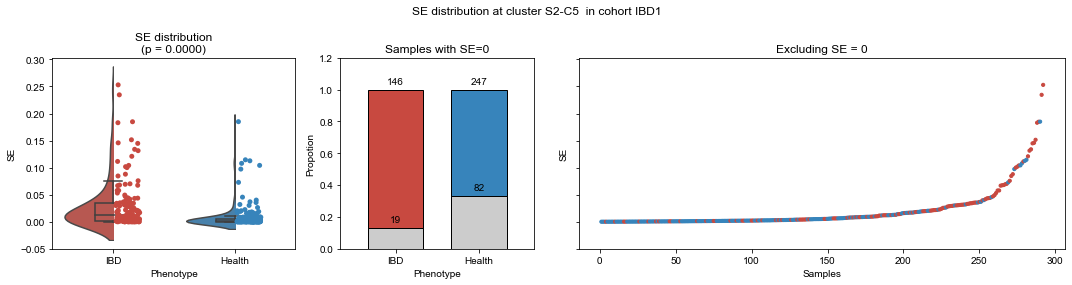

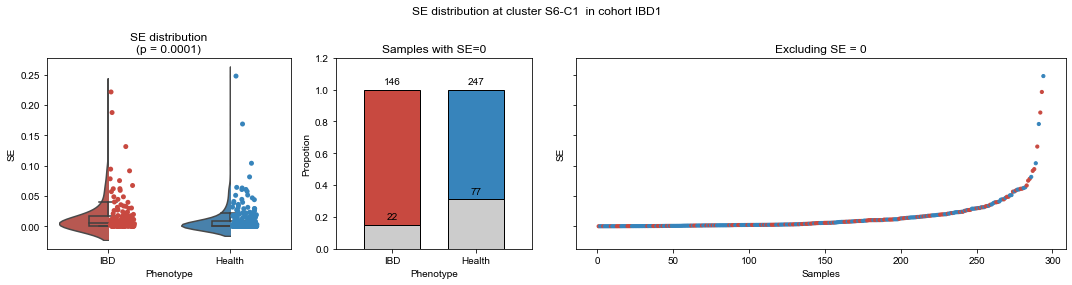

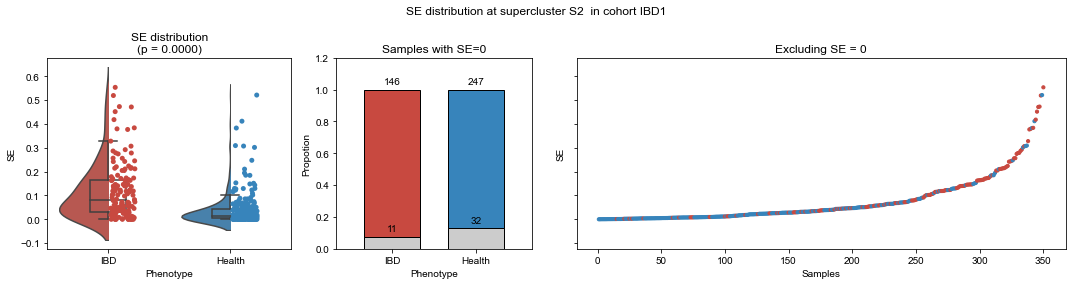

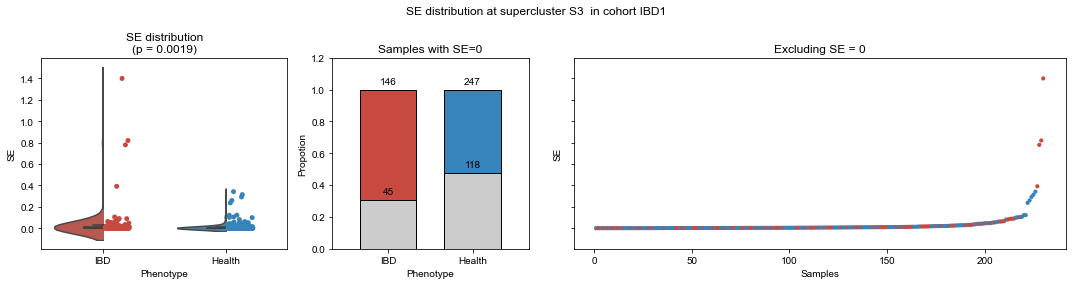

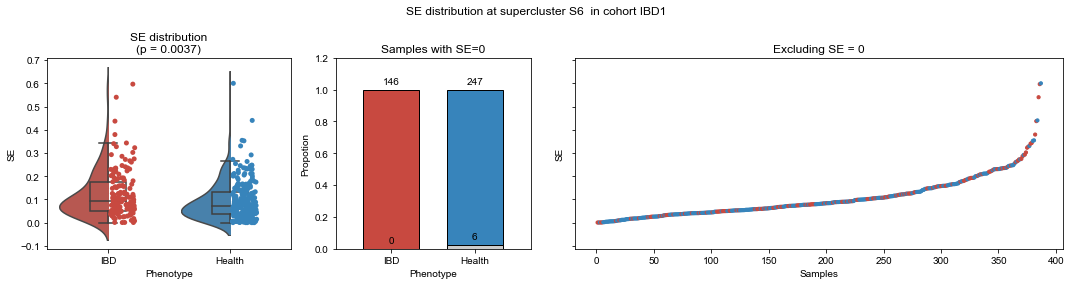

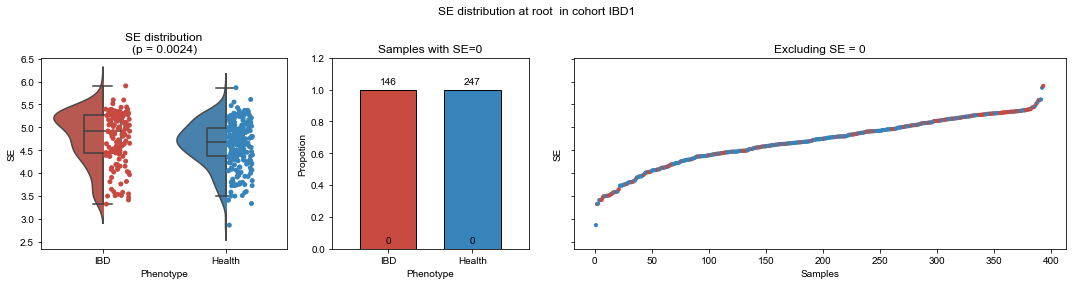

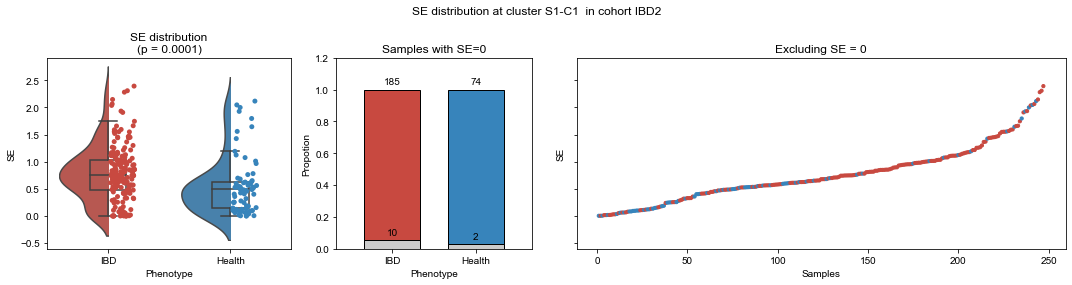

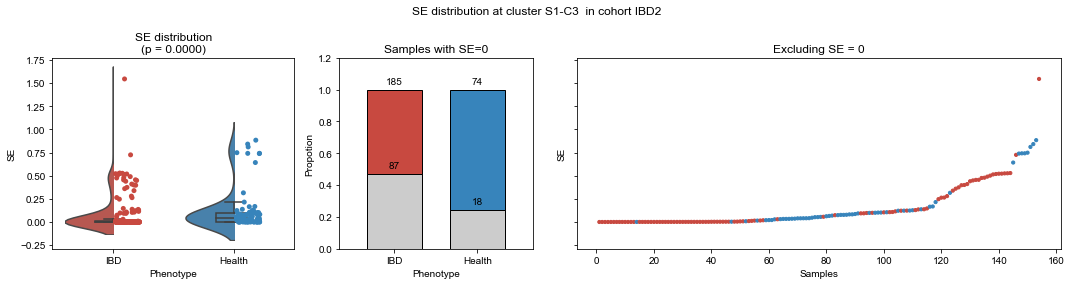

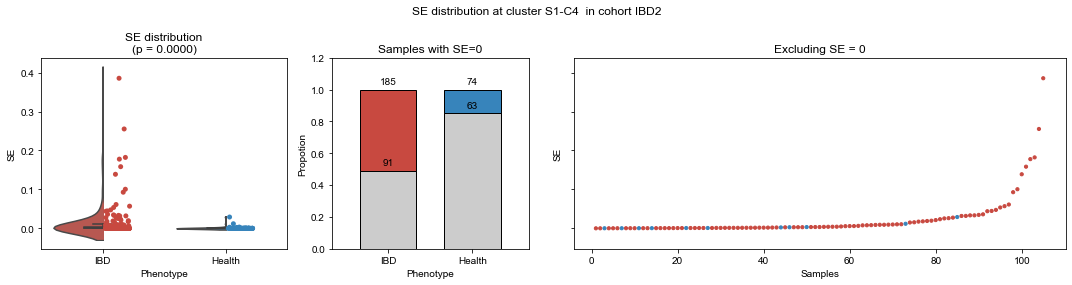

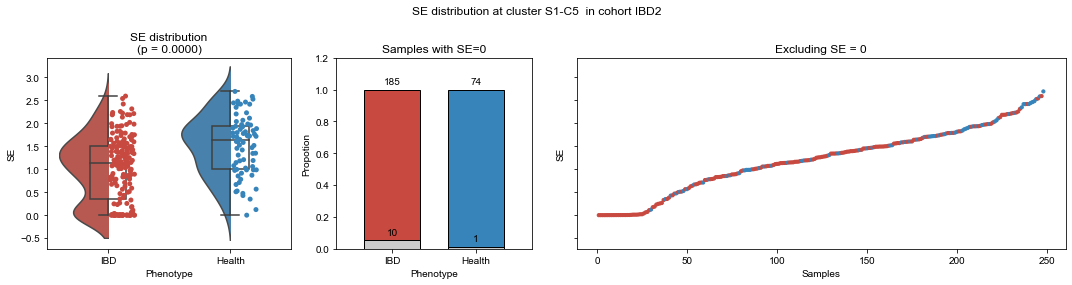

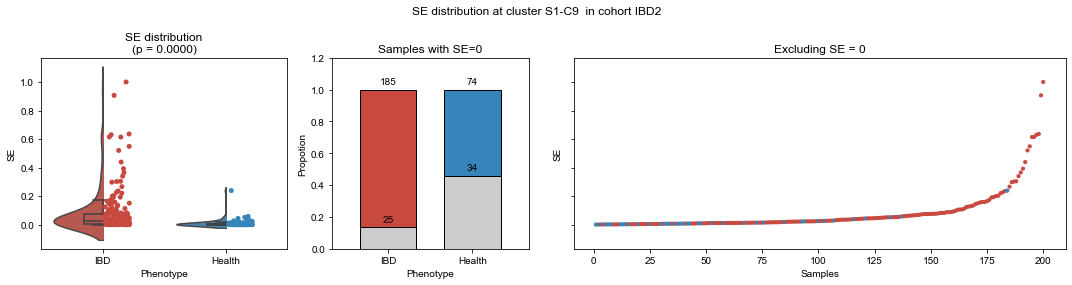

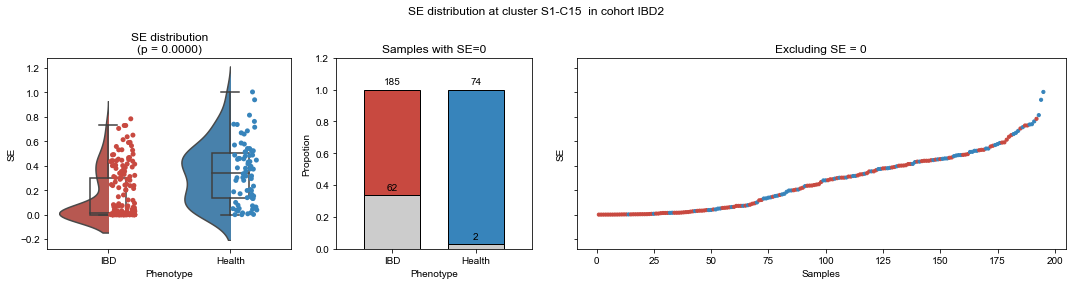

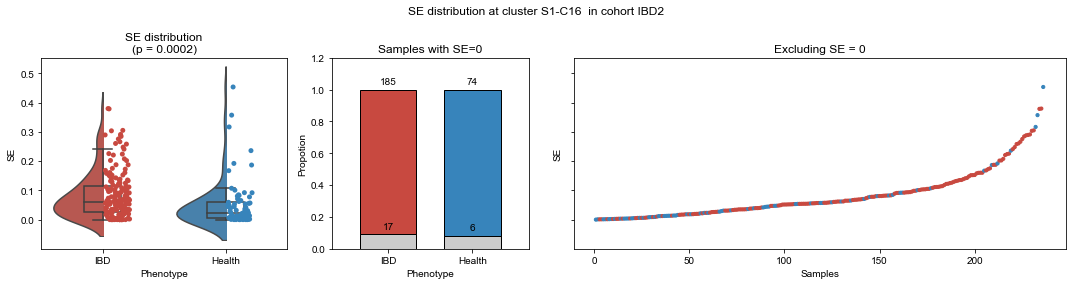

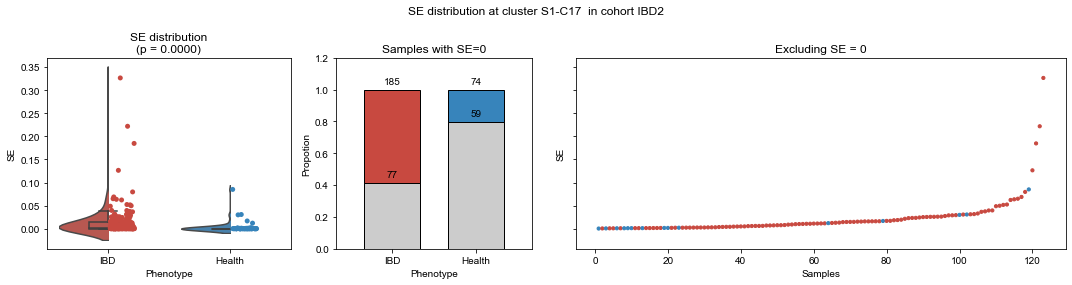

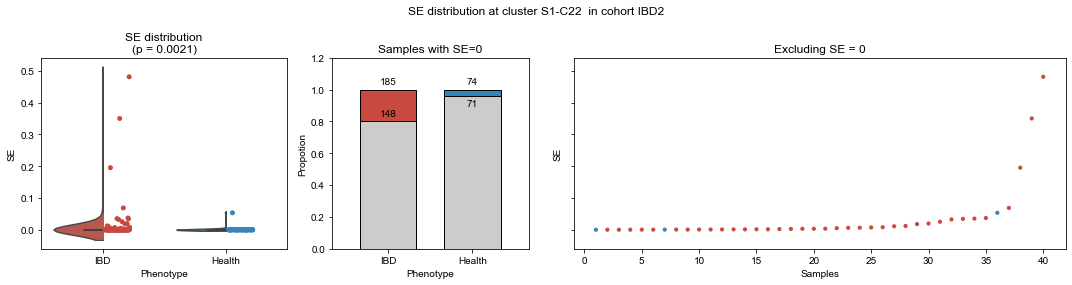

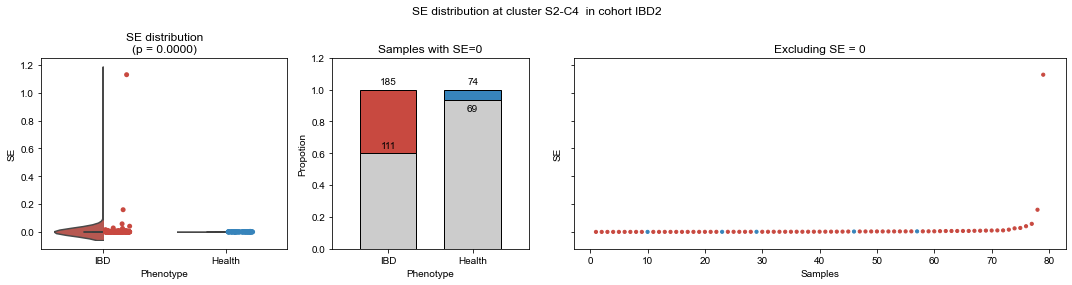

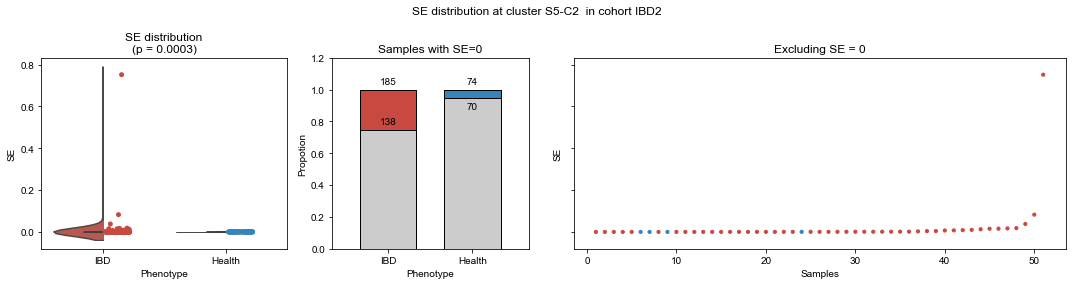

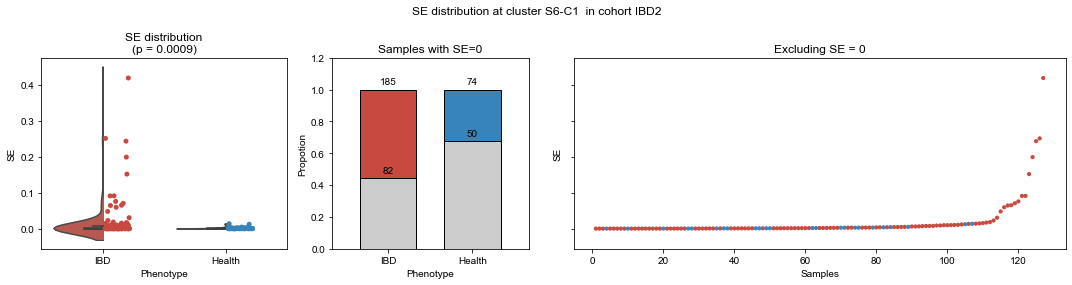

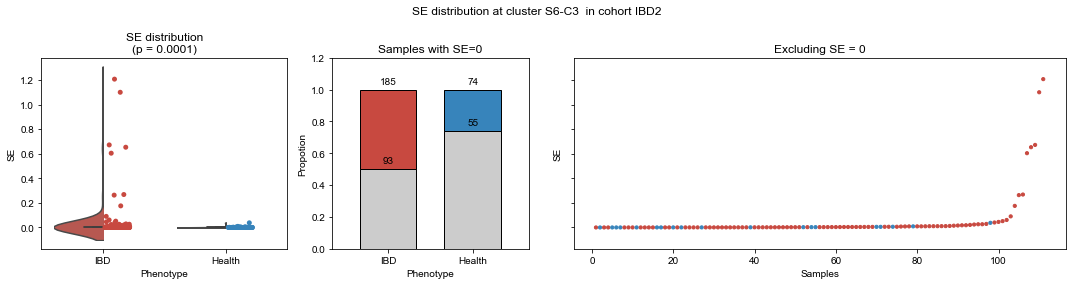

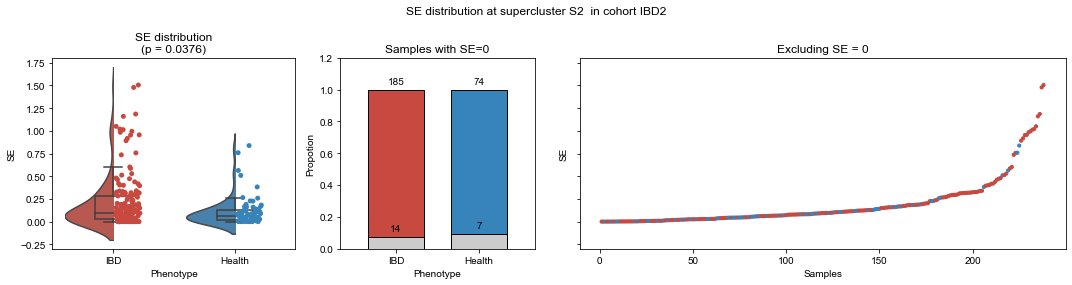

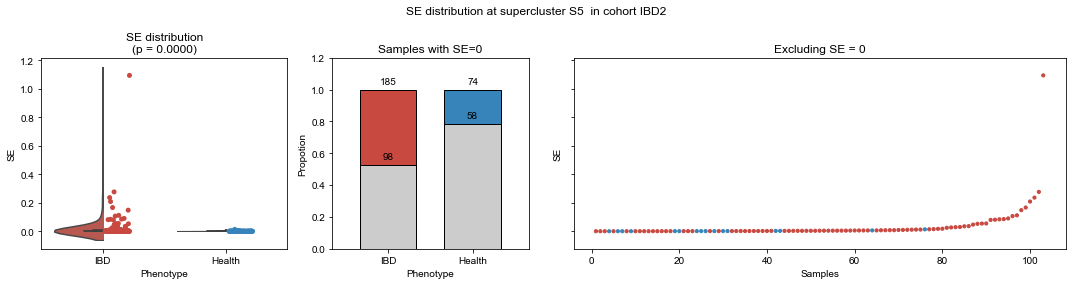

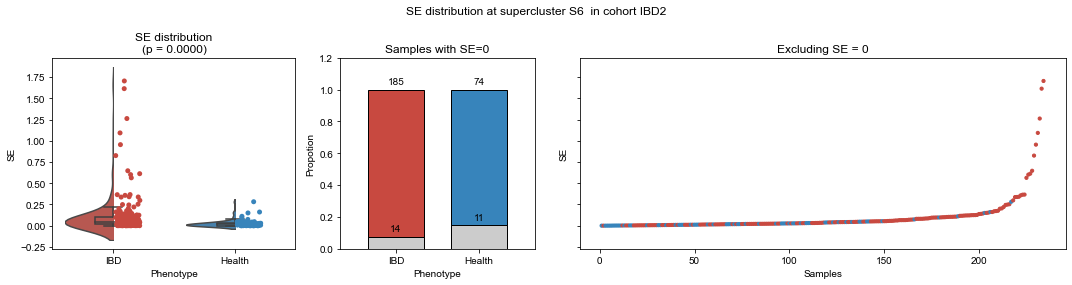

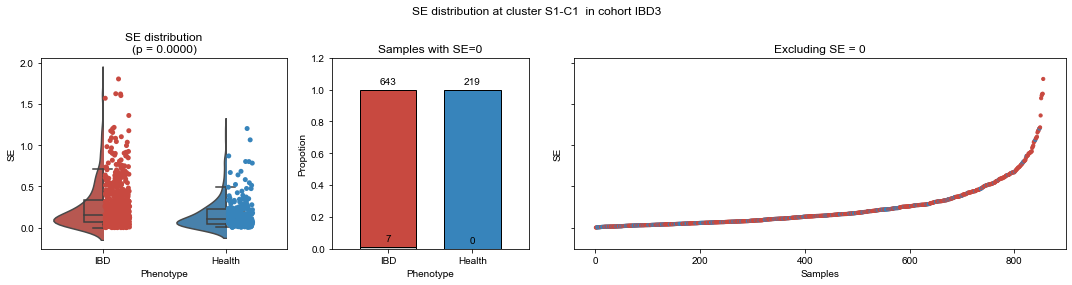

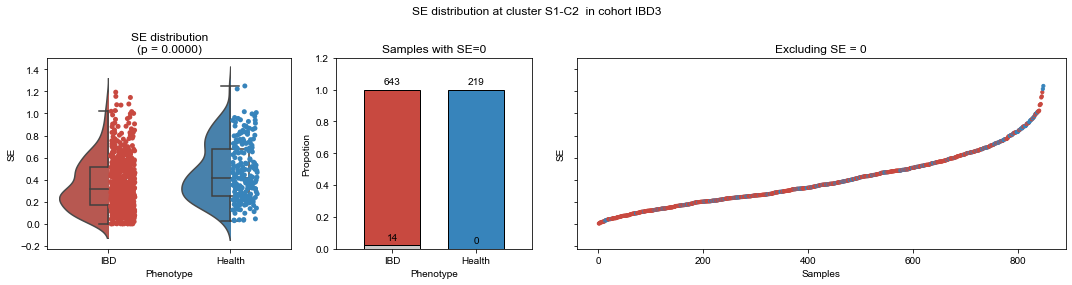

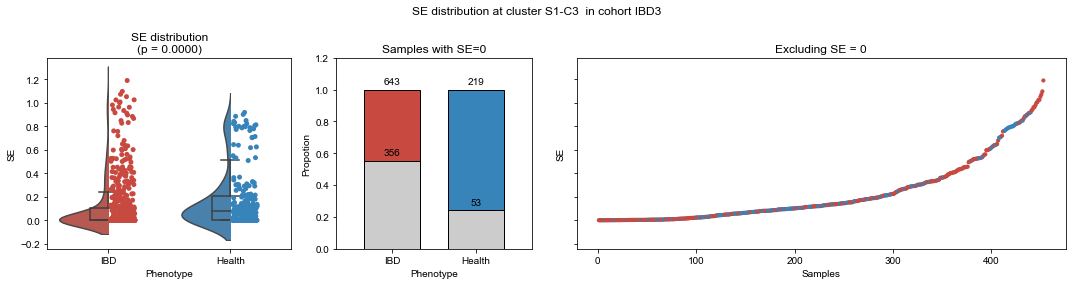

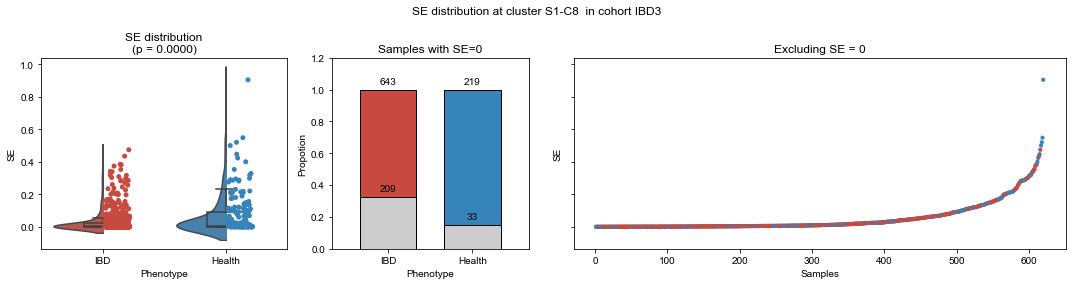

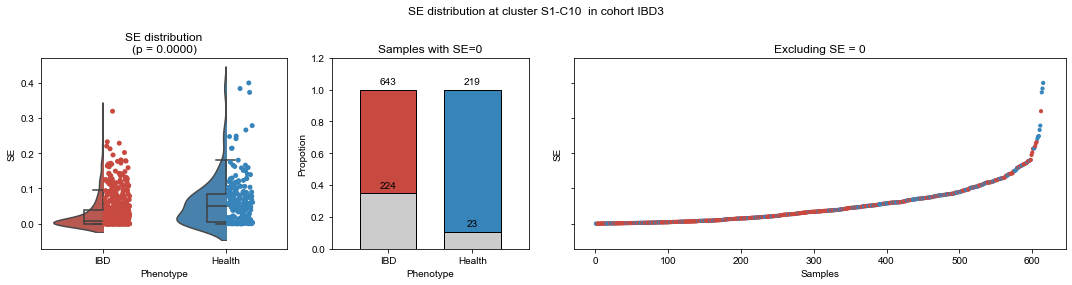

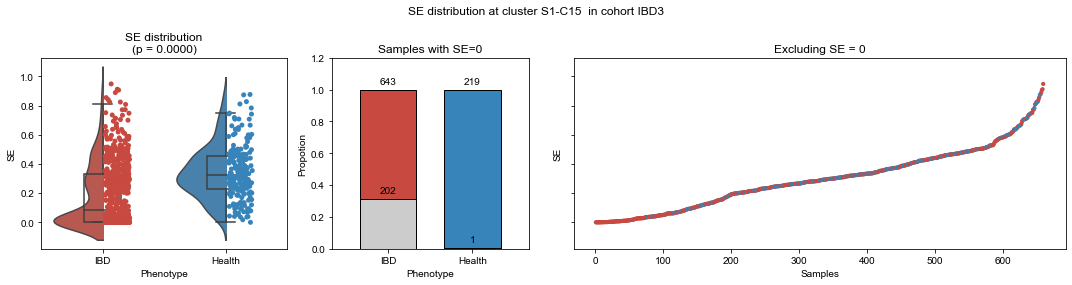

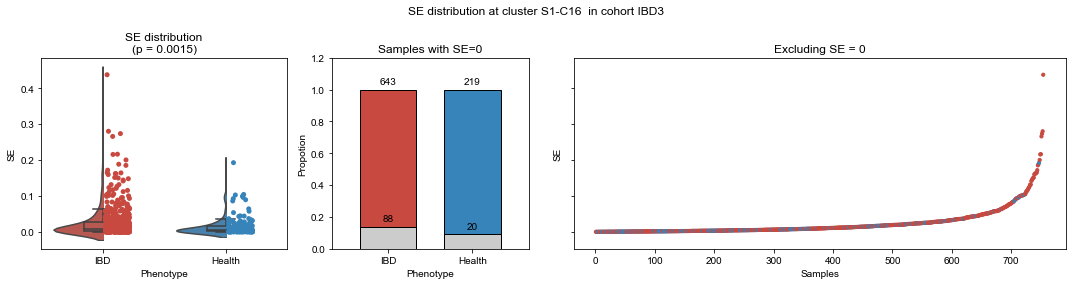

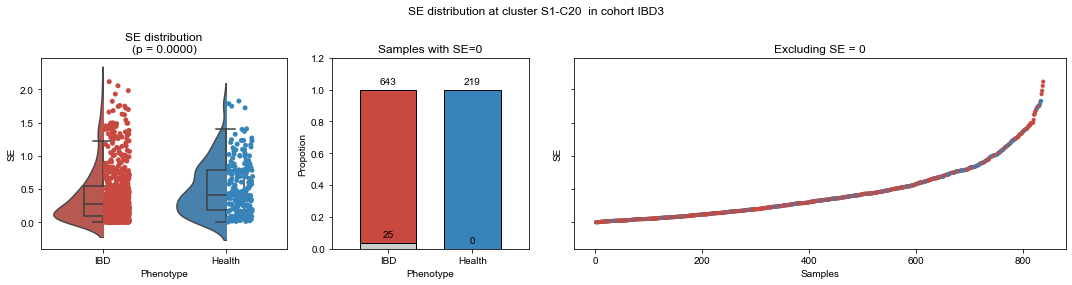

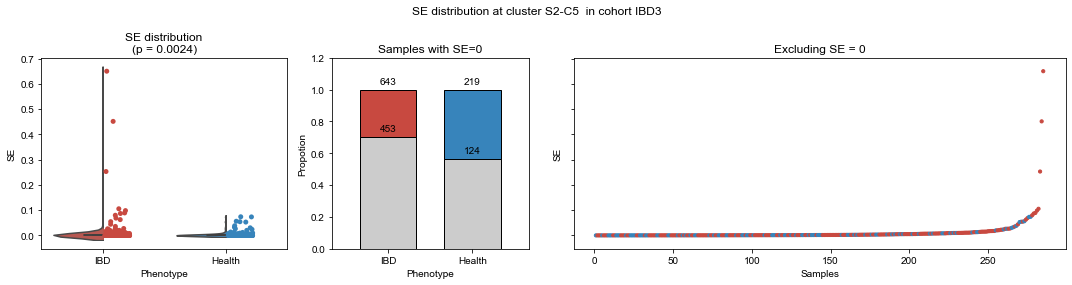

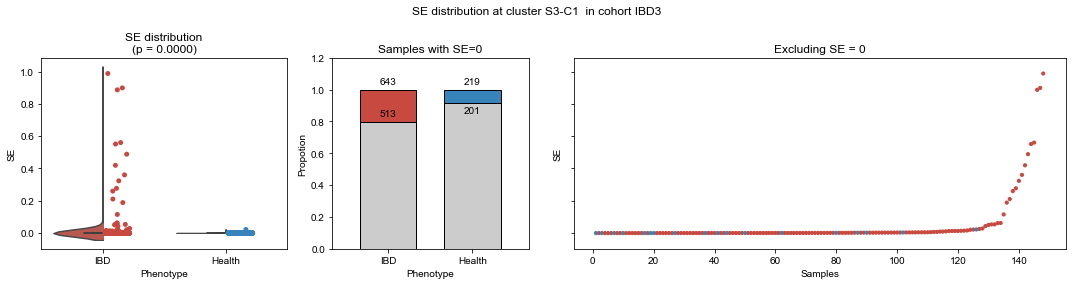

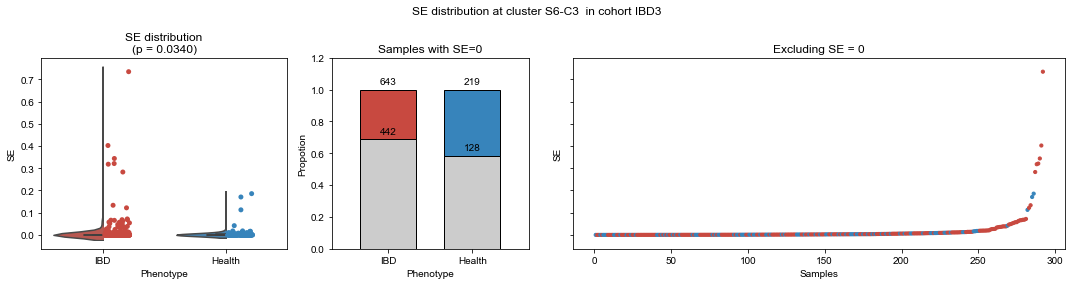

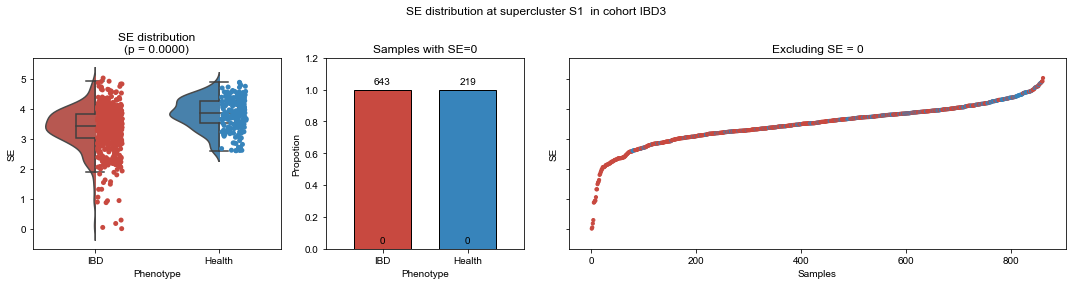

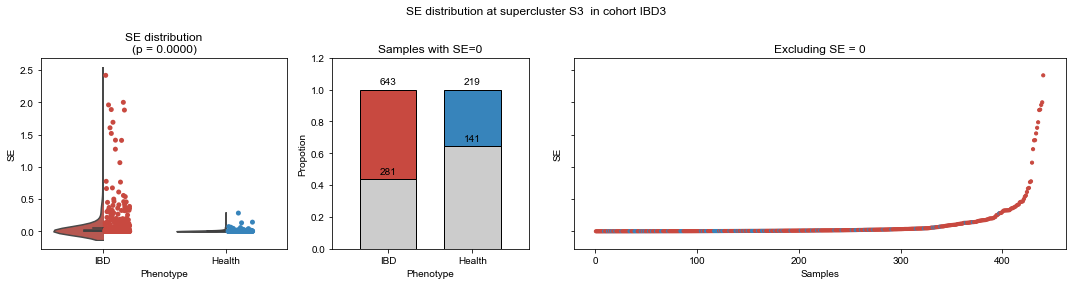

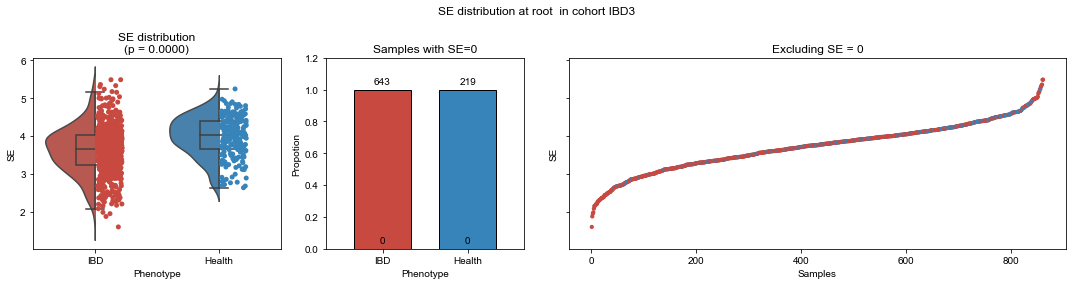

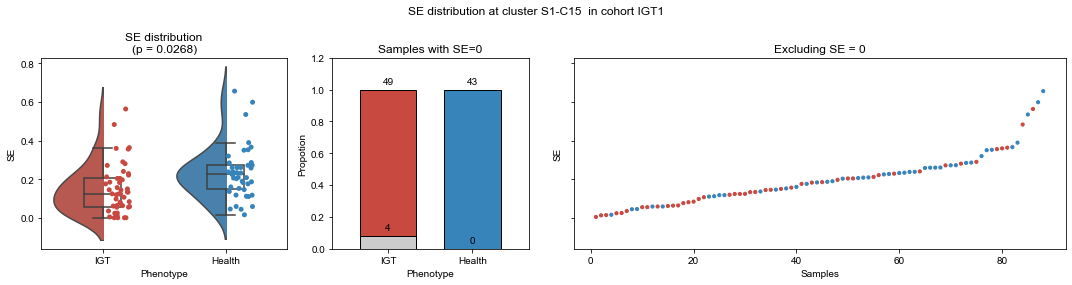

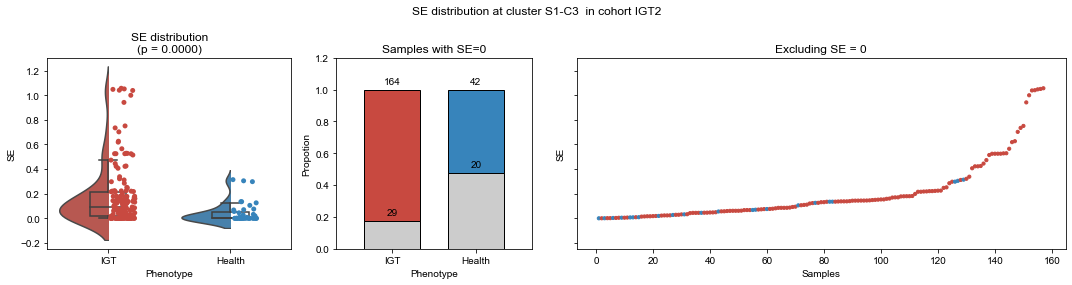

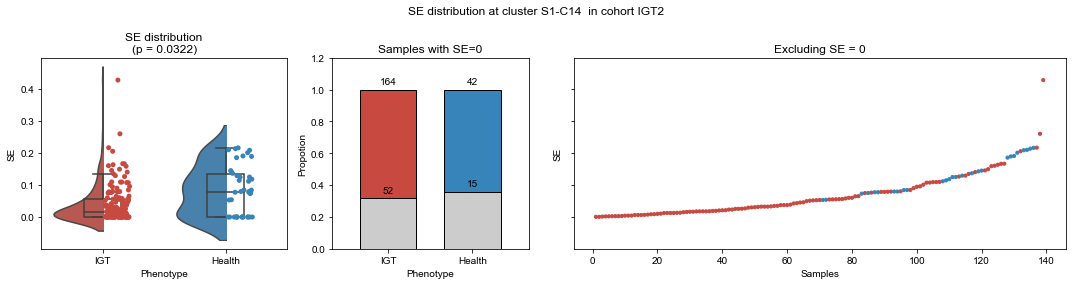

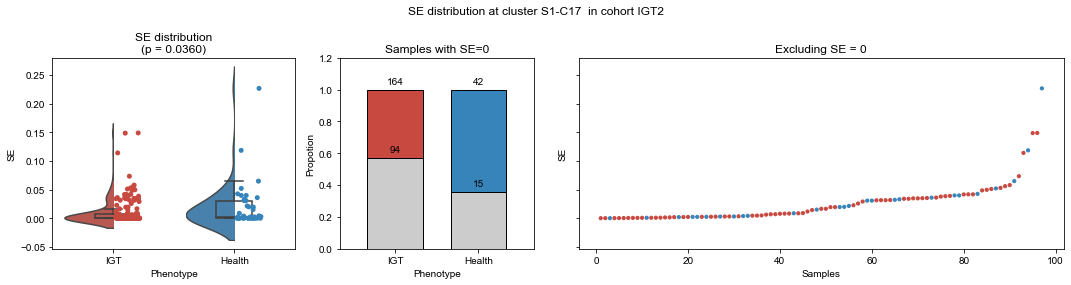

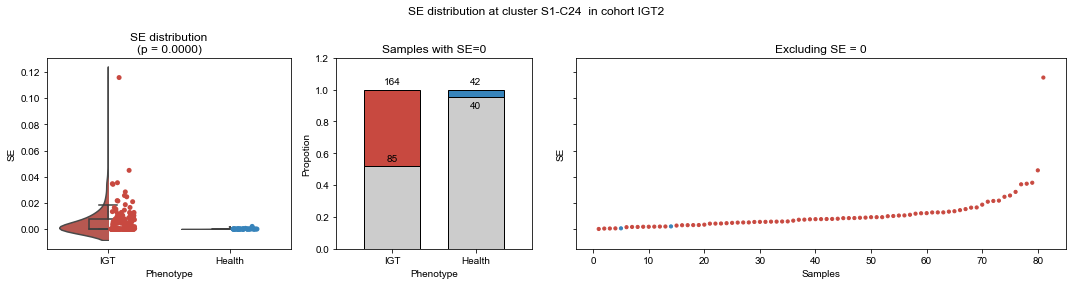

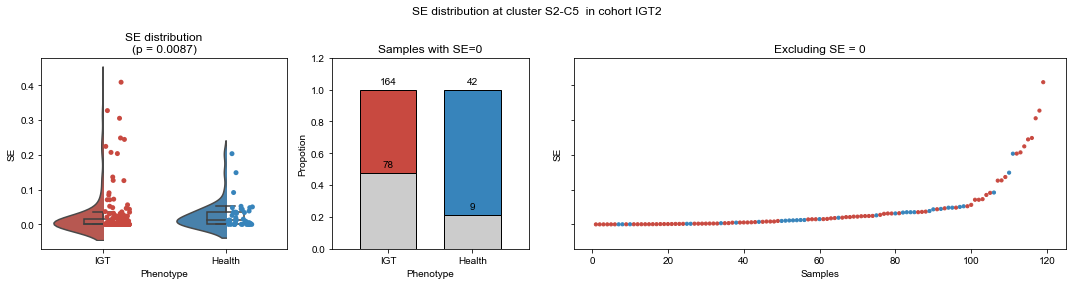

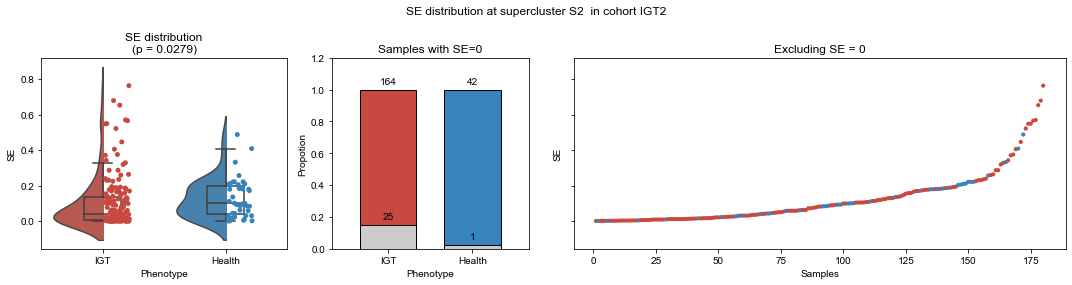

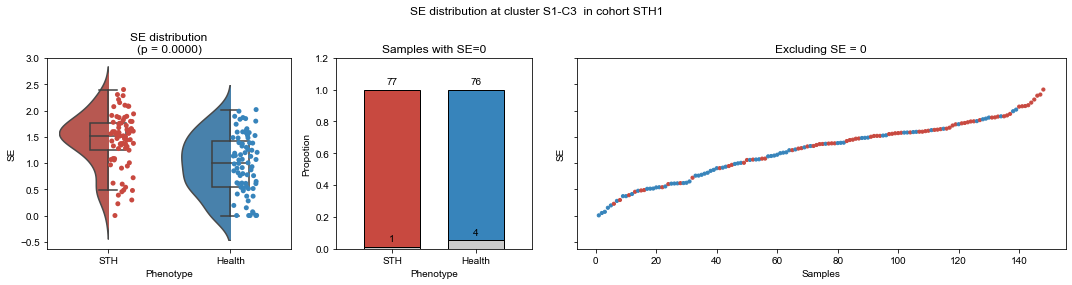

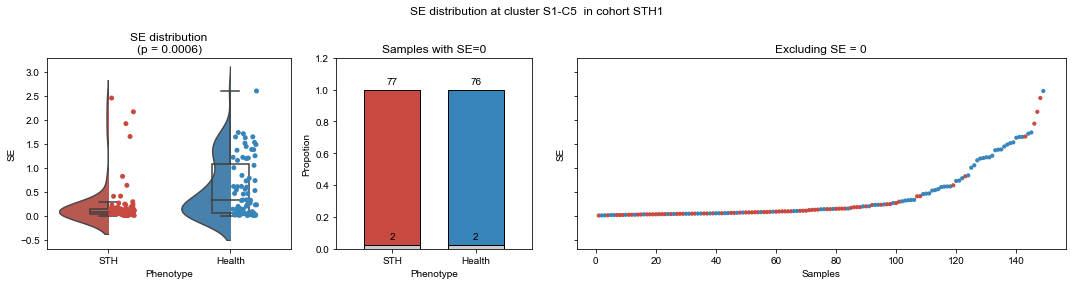

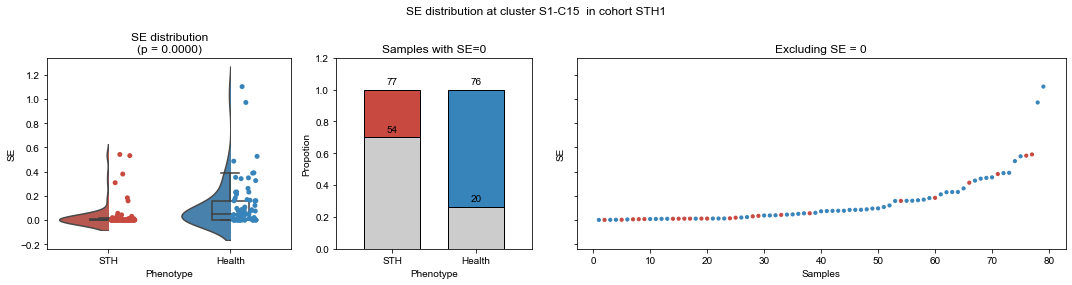

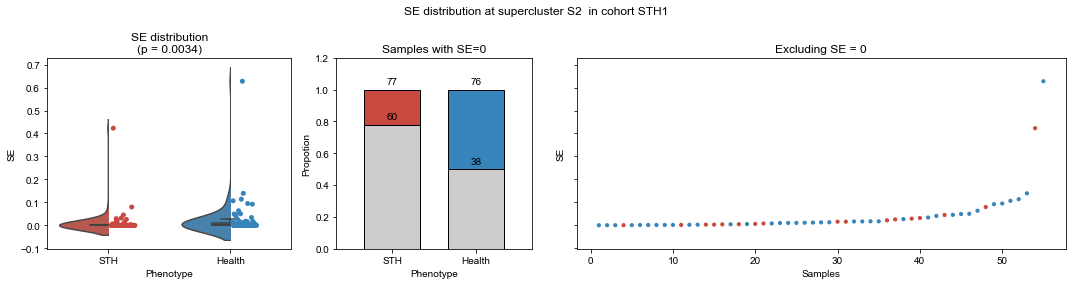

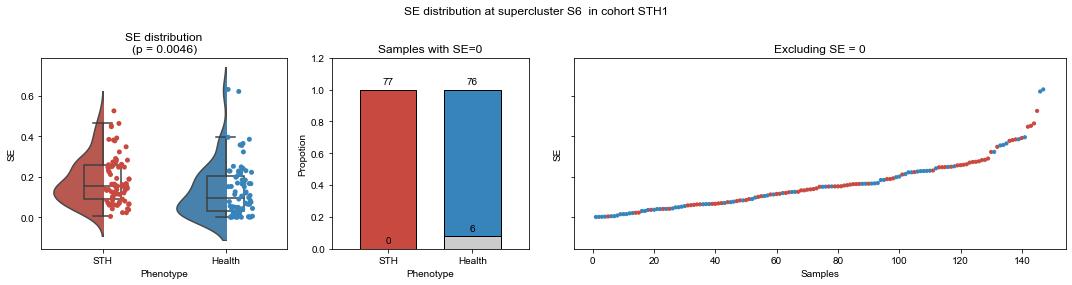

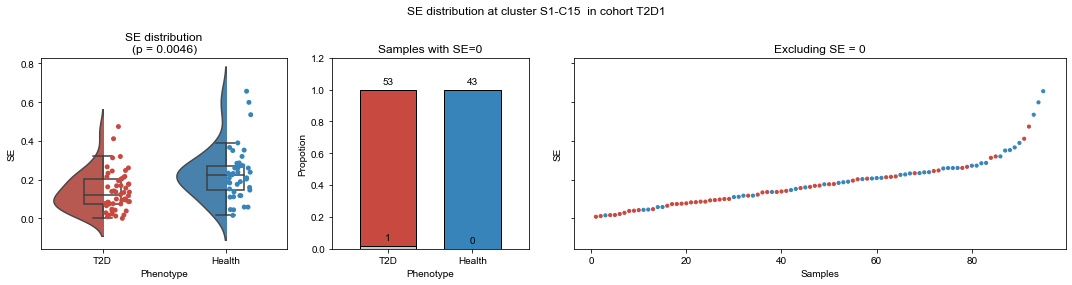

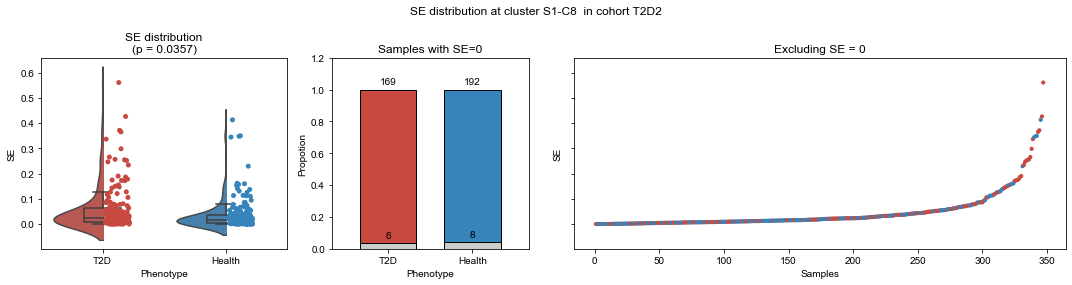

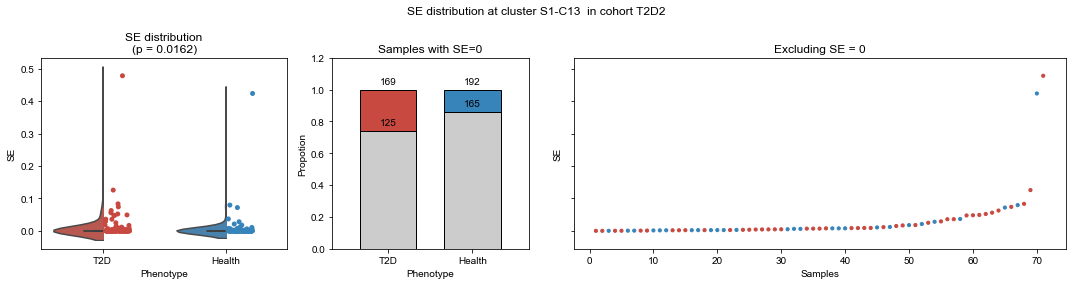

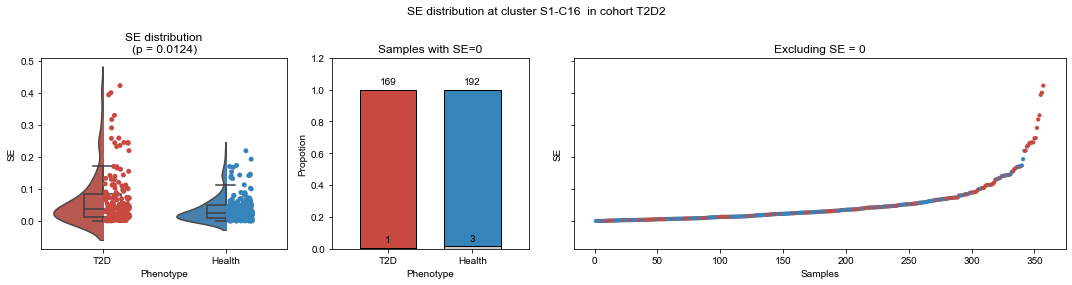

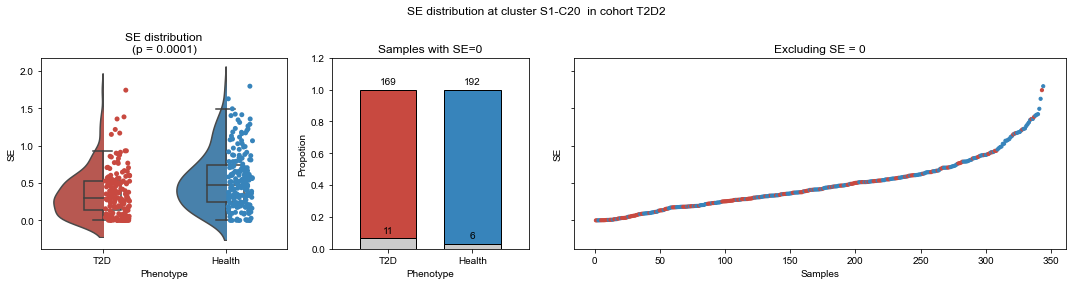

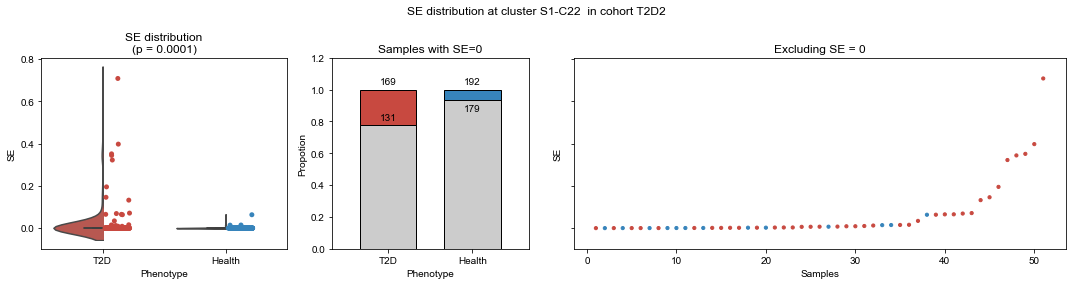

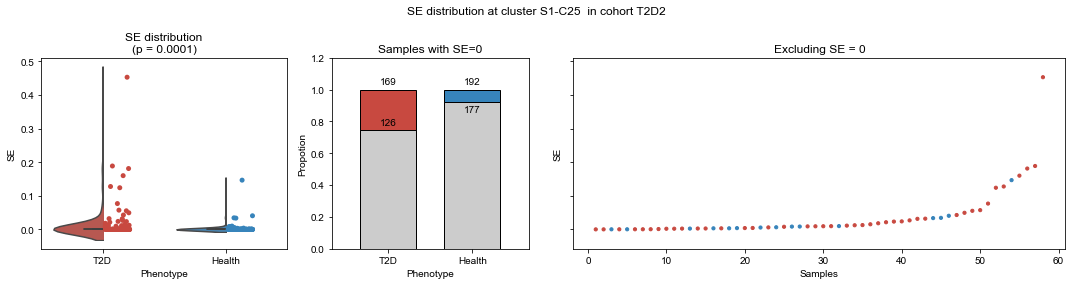

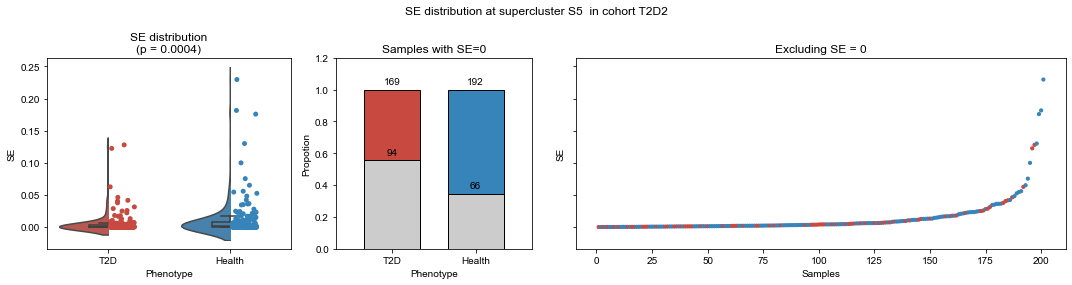

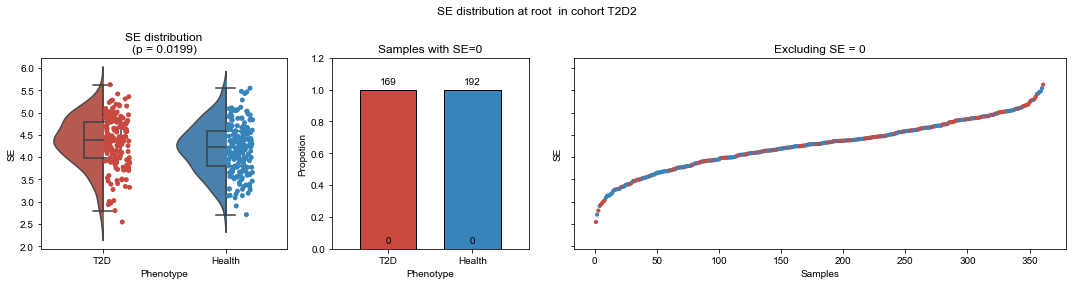

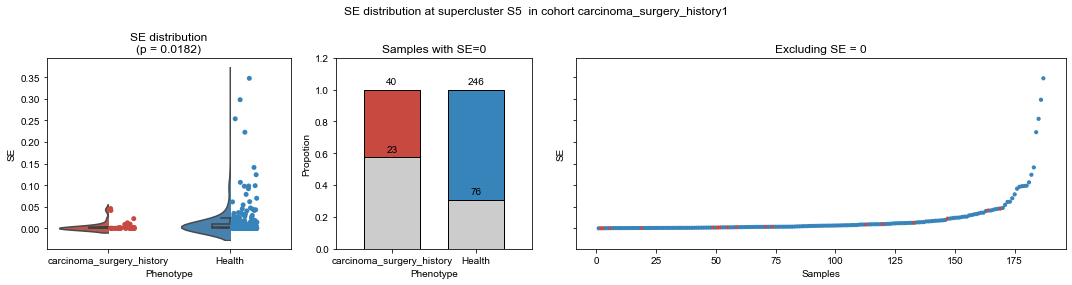

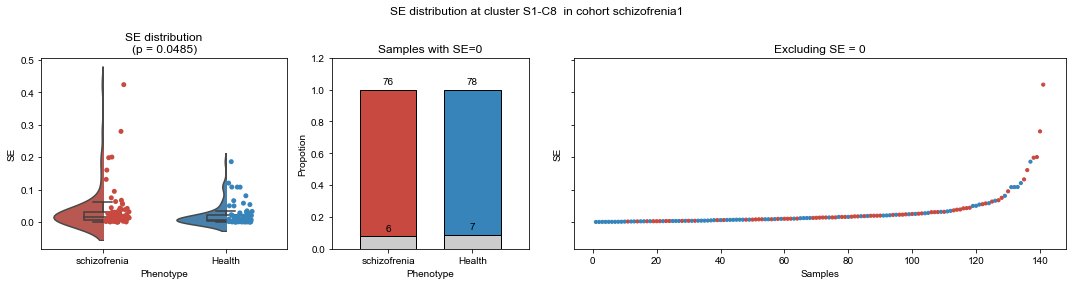

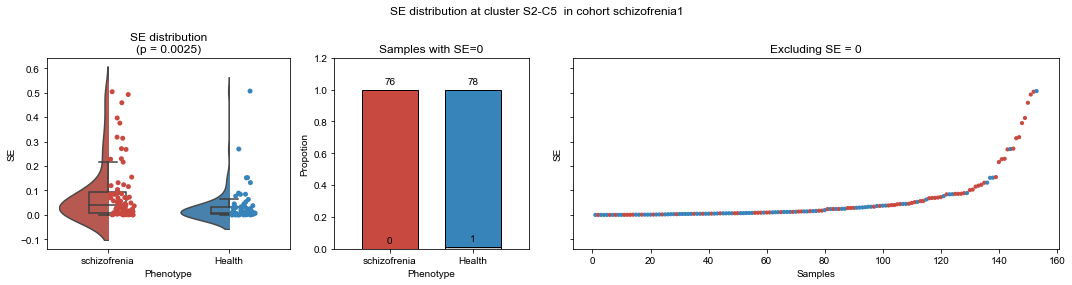

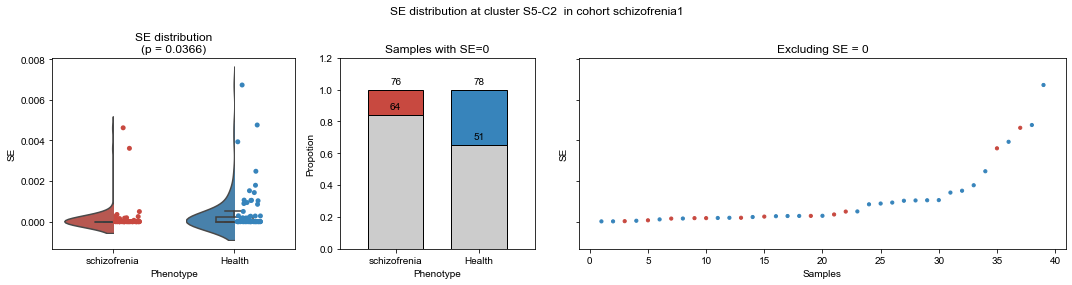

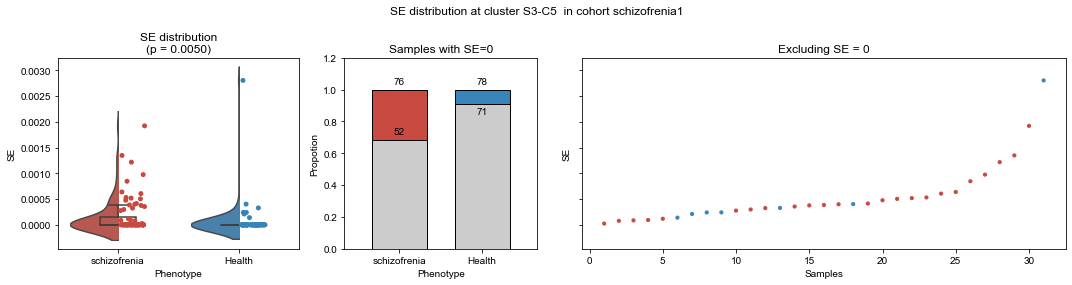

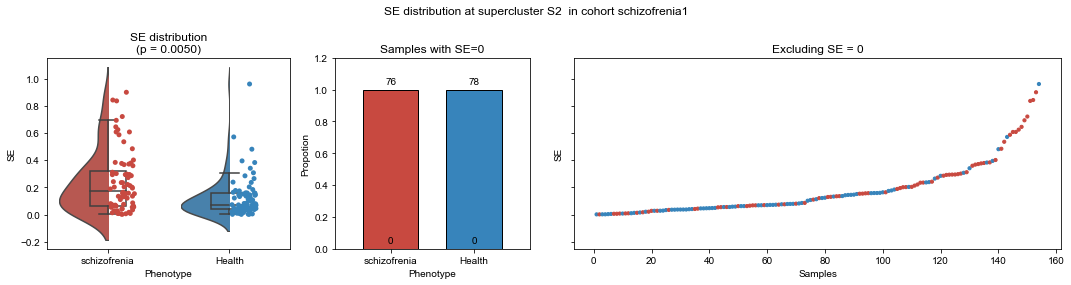

In [ ]:
outer = '../result/GCN_fix_tree/SE/GCN_tree_diff'
outdir = '../result/GCN_fix_tree/SE/SE_distribution'
plist = ['ACVD',
 'BD',
 'CRC',
 'IBD',
 'IGT',
 'CFS',
 'STH',
 'T2D',
 'adenoma',
 'asthma',
 'carcinoma_surgery_history',
 'hypertension',
 'migraine',
 'schizofrenia']
# plist = ['CRC']

p_df = pd.read_csv(os.path.join(outer,'p_all_cohorts.tsv'), sep='\t', index_col=0, header=0)
p_df.fillna(-1, inplace=True)
for p in plist:
    pheno_dir = os.path.join(outer, p)
    for project in os.listdir(pheno_dir):
        project_dir = os.path.join(pheno_dir, project)
        cohort_dict = {}
        for file in os.listdir(project_dir):
            if not file.startswith('se_'):
                continue
            filepath = os.path.join(project_dir, file)
            df = pd.read_csv(filepath, sep='\t', index_col=0, header=0)
            pheno = file.split('.')[0].split('se_')[-1]
            cohort_dict[pheno] = df
        for cluster in p_df.columns:
            p_value = p_df.loc[project, cluster]
            if p_value<0 or p_value >= 0.05:
                continue
            title = 'SE distribution at {}  in cohort {}'.format(cluster.replace('_', ' '), project)
            #title = '{} at {}'.format(project, cluster)
            p_value = p_df.loc[project, cluster]
            odir = os.path.join(outdir, cluster)
            if not os.path.exists(odir):
                os.makedirs(odir)
            outpath = os.path.join(odir, '{}.svg'.format(project))
            zero_n = sum(cohort_dict[p][cluster]==0) + sum(cohort_dict['Health'][cluster] == 0)
            total_n = len(cohort_dict[p][cluster]) + len(cohort_dict['Health'][cluster])
            zero_ratio = zero_n / total_n
            if zero_ratio > 1:
                continue
            draw_all(cohort_dict, cluster, title, p_value, outpath)
            #draw_cohort(cohort_dict, cluster, '{} at {}'.format(project, cluster))

In [5]:
cohort_dict.keys()

dict_keys(['Health', 'schizofrenia'])